# Table of contents

1. [What would you find in this project?](#what-would-you-find-in-this-project)
2. [Exploratory Data Analysis](#ExploratoryDataAnalysis)
    1. [Import data](#Importdata)
    2. [A First round of feature engineering](#FFE)
    3. [EDA for numerical features](#EDAN)
    4. [EDA for categorical features](#EDAC)
    3. [Seed questions](#SEED)
    3. [Summary of EDA](#SUMMARY)
3. [Machine Learning](#ML)
    1. [Outliers](#OUTLIERS)
    2. [Transform categorical variables to numerical](#TRANSFORMCAT)
    3. [Input missing values](#NULL)
    4. [Split in training and test dataset. Compare both](#SPLIT)
    5. [Performance Metrics](#METRIC)
    6. [Models](#Models)
        1. [SVM](#SVM)
        2. [Decision Forests](#DF)
        3. [Linear Regressions](#LR)
        4. [KNN](#KNN)
        5. [Neural Network](#NN)
        6. [First Model Comparison](#1MC)
        7. [PCA](#PCA)
        8. [Best Model](#BEST)
            1. [Interpretation](#INTERPRET)
        9. [Bonus: Pycaret](#PYCARET)
4. [Production](#PRODUCTION)
    1. [Get insights with models output](#NEWINSIGHTS)
    2. [Share model results with the company](#SHARE)

<a id="what-would-you-find-in-this-project"></a>
# What would you find in this project?

The purpose of this project is to deal with a **real world regression problem and approach it with a business concern**: from explaining the insights we can get just from the data, find a ML model that would fit on the regression problem and finally put into production the model and the insights we can get from it.

For this project I've chosen [this](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data) Kaggle dataset. This dataset contains information of different houses in Iowa and the goal of this project is to find a model that able to **predict the sale price of a house**. [Predicting the market price](https://www.future-processing.com/blog/the-importance-of-price-prediction/#what-benefits-do-businesses-see-from-price-prediction) of an element (in this case a house) gives to any business and important and powerful information to take advantage on. In the case of the real state business, one of these huge advantages could be improve to the profit margin and increase the turnover.

So, in the following sections we will put ourselves in the shoes of a real state company, which want to understand which useful insights we can get from their historical data, train a model able to predict the price of a house and take advantage of this to increase the turnover.

<a id='ExploratoryDataAnalysis'></a>
# Exploratory Data Analysis

In any ML project, the [first step](https://www.bitstrapped.com/blog/exploratory-data-analysis-accelerates-machine-learning) should be done an exploratory data analysis, not only because doing this will help us to understand better the data we're working with, but also let us know if there are problems in the data we're working on prior trying to model it, let us know that the model we've trained is reliable and finally is a first step to bring useful insights without even have to train a model.

<a id='Importdata'></a>
## Import data

First of all, we'll import (and install) all necessary libraries we'll need in this notebook.

In [1]:
#pip install keras-tuner
#pip install xgboost
#pip install pycaret
#pip install catboost
#pip install lightgbm
#pip install tensorflow
#pip install keras
#pip install scikeras
#pip install imbalanced-learn==0.11.0 
#pip install shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split, KFold, cross_val_score,  GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras_tuner.tuners import RandomSearch, Hyperband
import keras_tuner as kt
from scipy.stats import zscore
import shap
import pickle
import warnings
warnings.filterwarnings('ignore') #For a cleaner lecture
%matplotlib inline

Now, we can import the data and take a look to the first rows:

In [2]:
df = pd.read_csv('train.csv')
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


Let's take a look to the features of our dataset, the type of each features inferred from pandas and the count of not null values:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

As we can see above we have a dataset with 1460 rows and 81 columns. [Here](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data?select=data_description.txt) you can see a description of each feature, get from the kaggle dataset.


The feature id is a unique identifier for each house, so it doesn't have any relevance to get any insight from it or for training the model, that's why we'll delete this from the dataset:

In [4]:
df.drop(columns = ['Id'], inplace = True)

Another important thing is to **check how many null data** we have on the dataset. In case we only have a few nulls or to much nulls, we just can delete those records/feature, but otherwise we'll have to infer the missing data. Here you can see all the features with the total of null values:

In [5]:
null_count = df.isna().sum()
null_count = null_count.where(null_count > 0).dropna().sort_values(ascending = False)
total_null_values = null_count.to_frame(name="count_nulls")
perc_null_values = (round(100*null_count/len(df),2)).to_frame(name="perc_null")
df_null_values = pd.concat([total_null_values, perc_null_values], axis=1)
df_null_values

,count_nulls,perc_null
PoolQC,1453.0,99.52
MiscFeature,1406.0,96.30
Alley,1369.0,93.77
Fence,1179.0,80.75
FireplaceQu,690.0,47.26
LotFrontage,259.0,17.74
GarageType,81.0,5.55
GarageYrBlt,81.0,5.55
GarageFinish,81.0,5.55
GarageQual,81.0,5.55


There are 4 features with more than 80% missing data: PoolQC, MiscFeature, Alley and Fence. It's way to much null data to try estimate its value so we'll delete these columns from the dataset. Anyway, if we could have access to the original data could be **good to know why there's missing so much data** for these columns and try to fill those values from the source.    

There is *no consensus on how many null values a feature should have to eliminate it*, but some you can find out in some sources (like [this](https://towardsdatascience.com/7-ways-to-handle-missing-values-in-machine-learning-1a6326adf79e) one) that from 50% of null in a feature, you can remove the whole feature from the dataset.

In [6]:
df.drop(columns = ['PoolQC', 'MiscFeature', 'Alley', 'Fence'], inplace = True)

<a id='FFE'></a>
## A First round of feature engineering 

Taking a look info the description of each feature, we can realise that there are some ordinal features that are defined as object. Let's do a numerical transformation to these features in order to work in an easier way with them:

In [7]:
# Making Dictionaries of ordinal features
ExterQual_map = {  #Evaluates the quality of the material on the exterior 
    'Po' :    1,
    'Fa' :    2,
    'TA' :    3,
    'Gd' :    4,
    'Ex' :    5
    }

ExterCond_map = ExterQual_map # Evaluates the present condition of the material on the exterior

BsmtQual_map = ExterQual_map #Evaluates the height of the basement
BsmtQual_map['NA'] = -1

BsmtCond_map = BsmtQual_map #Evaluates the general condition of the basement

BsmtExposure_map = {  #Refers to walkout or garden level walls
    'NA' :    -1,
    'No' :    0,
    'Mn' :    1,
    'Av' :    2,
    'Gd' :    3
    }

BsmtFinType1_map = {  #Rating of basement finished area
    'NA' :    -1,
    'Unf' :    0,
    'LwQ' :    1,
    'Rec' :    2,
    'BLQ' :    3,
    'ALQ' :    4,
    'GLQ' :    5
    }

BsmtFinType2_map = BsmtFinType1_map #Rating of basement finished area (if multiple types)

HeatingQC_map = ExterQual_map #Heating quality and condition

CentralAir_map = {  #Central air conditioning
   'Y': 1,
   'N': 0
}

KitchenQual_map = ExterQual_map #Kitchen quality

FireplaceQu_map = BsmtQual_map #Fireplace quality

GarageFinish_map = { #Interior finish of the garage
    'NA': -1,
    'Unf': 0,
    'RFn': 1,
    'Fin': 2
}

GarageQual_map = BsmtQual_map #Garage quality

GarageCond_map = BsmtQual_map #Garage condition

PavedDrive_map = {  #Paved driveway
    'N': 0,
    'P': 1,
    'Y': 2
}

# Transforming Categorical features into numerical features
df_first_transform = df.copy()
df_first_transform.loc[:,'ExterQual'] = df_first_transform['ExterQual'].map(ExterQual_map)
df_first_transform.loc[:,'ExterCond'] = df_first_transform['ExterCond'].map(ExterCond_map)
df_first_transform.loc[:,'BsmtQual'] = df_first_transform['BsmtQual'].map(BsmtQual_map)
df_first_transform.loc[:,'BsmtCond'] = df_first_transform['BsmtCond'].map(BsmtCond_map)
df_first_transform.loc[:,'BsmtExposure'] = df_first_transform['BsmtExposure'].map(BsmtExposure_map)
df_first_transform.loc[:,'BsmtFinType1'] = df_first_transform['BsmtFinType1'].map(BsmtFinType1_map)
df_first_transform.loc[:,'BsmtFinType2'] = df_first_transform['BsmtFinType2'].map(BsmtFinType2_map)
df_first_transform.loc[:,'HeatingQC'] = df_first_transform['HeatingQC'].map(HeatingQC_map)
df_first_transform.loc[:,'CentralAir'] = df_first_transform['CentralAir'].map(CentralAir_map)
df_first_transform.loc[:,'KitchenQual'] = df_first_transform['KitchenQual'].map(KitchenQual_map)
df_first_transform.loc[:,'FireplaceQu'] = df_first_transform['FireplaceQu'].map(FireplaceQu_map)
df_first_transform.loc[:,'GarageFinish'] = df_first_transform['GarageFinish'].map(GarageFinish_map)
df_first_transform.loc[:,'GarageQual'] = df_first_transform['GarageQual'].map(GarageQual_map)
df_first_transform.loc[:,'GarageCond'] = df_first_transform['GarageCond'].map(GarageCond_map)
df_first_transform.loc[:,'PavedDrive'] = df_first_transform['PavedDrive'].map(PavedDrive_map)

df_first_transform.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

As we can see above, the ordinal features has been changed to a float64 type (due there are also null values). Finally, let's **add two more important features**: total square feet of the house and the total of bathrooms:

In [8]:
df_first_transform['TotalSF'] = df_first_transform['TotalBsmtSF'] + df_first_transform['GrLivArea']
df_first_transform['Total_Bathrooms'] = df_first_transform['FullBath'] + df_first_transform['HalfBath'] + df_first_transform['BsmtFullBath'] + df_first_transform['BsmtHalfBath']

# Code for transforming the dataset. We'll be use it later.
def feature_engineering_sale_price_dataset(df):
    df_first_transform = df.copy()
    df_first_transform.drop(columns = ['PoolQC', 'MiscFeature', 'Alley', 'Fence'], inplace = True)
    df_first_transform.loc[:,'ExterQual'] = df_first_transform['ExterQual'].map(ExterQual_map)
    df_first_transform.loc[:,'ExterCond'] = df_first_transform['ExterCond'].map(ExterCond_map)
    df_first_transform.loc[:,'BsmtQual'] = df_first_transform['BsmtQual'].map(BsmtQual_map)
    df_first_transform.loc[:,'BsmtCond'] = df_first_transform['BsmtCond'].map(BsmtCond_map)
    df_first_transform.loc[:,'BsmtExposure'] = df_first_transform['BsmtExposure'].map(BsmtExposure_map)
    df_first_transform.loc[:,'BsmtFinType1'] = df_first_transform['BsmtFinType1'].map(BsmtFinType1_map)
    df_first_transform.loc[:,'BsmtFinType2'] = df_first_transform['BsmtFinType2'].map(BsmtFinType2_map)
    df_first_transform.loc[:,'HeatingQC'] = df_first_transform['HeatingQC'].map(HeatingQC_map)
    df_first_transform.loc[:,'CentralAir'] = df_first_transform['CentralAir'].map(CentralAir_map)
    df_first_transform.loc[:,'KitchenQual'] = df_first_transform['KitchenQual'].map(KitchenQual_map)
    df_first_transform.loc[:,'FireplaceQu'] = df_first_transform['FireplaceQu'].map(FireplaceQu_map)
    df_first_transform.loc[:,'GarageFinish'] = df_first_transform['GarageFinish'].map(GarageFinish_map)
    df_first_transform.loc[:,'GarageQual'] = df_first_transform['GarageQual'].map(GarageQual_map)
    df_first_transform.loc[:,'GarageCond'] = df_first_transform['GarageCond'].map(GarageCond_map)
    df_first_transform.loc[:,'PavedDrive'] = df_first_transform['PavedDrive'].map(PavedDrive_map)
    df_first_transform['TotalSF'] = df_first_transform['TotalBsmtSF'] + df_first_transform['GrLivArea']
    df_first_transform['Total_Bathrooms'] = df_first_transform['FullBath'] + df_first_transform['HalfBath'] + df_first_transform['BsmtFullBath'] + df_first_transform['BsmtHalfBath']
    return df_first_transform

<a id='EDAN'></a>
## Exploratory Data Analysis of SalePrice for numerical features

This dataset contains too many features to explain them by themselves and their relationship to each other to extract information one at a time. That's why we'll try to filter the important features from our predictive feature SalePrice and then we could extract more detailed analysis only from them and get useful insights.

This first feature filter we'll do it using the **spearman correlation** (because we're dealing with ordinal and continous variables). We'll only do the exploratory data analysis with features with the greatest correlation with our SalePrice feature.

<AxesSubplot: >

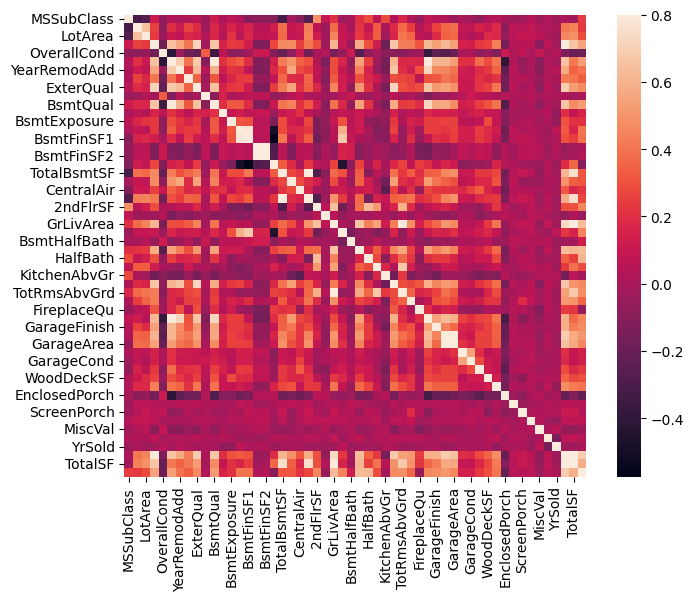

In [9]:
corrmat = df_first_transform.corr(method='spearman')
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corrmat, vmax=.8, square=True)

This first filter, only contains numerical features. We'll deal later with the categorical features of the dataset. For now, we'll keep those features with a correlation at least 0.6 (positive or negative), from that value we can assume that [exists a strong correlation](https://www.statstutor.ac.uk/resources/uploaded/spearmans.pdf).

Also, we'll sort the correlation matrix in order that the most correlated features will appear on the top of the heatmap:

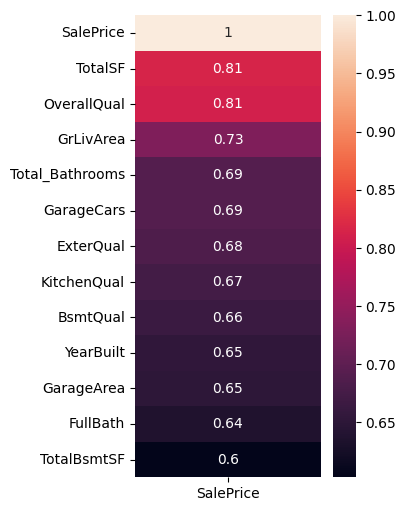

In [10]:
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>=0.6]
plt.figure(figsize=(3,6))
g = sns.heatmap(df_first_transform[top_corr_features].corr(method='spearman')[['SalePrice']].sort_values('SalePrice', ascending=False),annot=True)

So, there are 2 features very strongly correlated with SalesPrice:
- **OverallQual** (Rates the overall material and finish of the house)
- **TotalSF** (Living area square feet inc.)

and 10 features strongly correlated with SalesPrice: 
- **GrLivArea** (Above grade (ground) living area square feet)
- **Total_Bathrooms** (Total of bathrooms inc. basement)
- **Full Bath** (Total of Full bathrooms above grade)
- **GarageCars** (Size of garage in car capacity)
- **GarageArea** (Size of garage in square feet)
- **ExterQual** (Evaluates the quality of the material on the exterior)
- **KitchenQual** (Kitchen quality)
- **BsmtQual** (Evaluates the height of the basement)
- **YearBuilt** (Original construction date)
- **TotalBsmtSF** (Total square feet of basement area)

In addition, in the correlation matrix doesn't appear any high negative correlation, so this means that a high value of any of these features also has a high value for sale price and low value of any of these features also has a low value for sale price.

Finally, we can get the firsts insights from this correlation matrix:
- At first place, for greater **material qualities** of the house (specially for the exterior, the kitchen and the basement) we can expect higher house prices.
- In second place, also we can expect higher price for larger **total square feet** of the house (specially for the living ground and the basement)
- Finally,  the **total number of bathrooms** and the **year construction** of the house also are positively correlated with the price sale.

Note that in the previous correlation doesn't appear any feature about the condition of the house (overall, material of the exterior, basement) and that's interesting because it doesn't seem that the actual condition of the house is highly related to the sale price, but it does the qualities (as we've seen above). 

Let's check this plotting the relation of these features with the Sales Price feature:

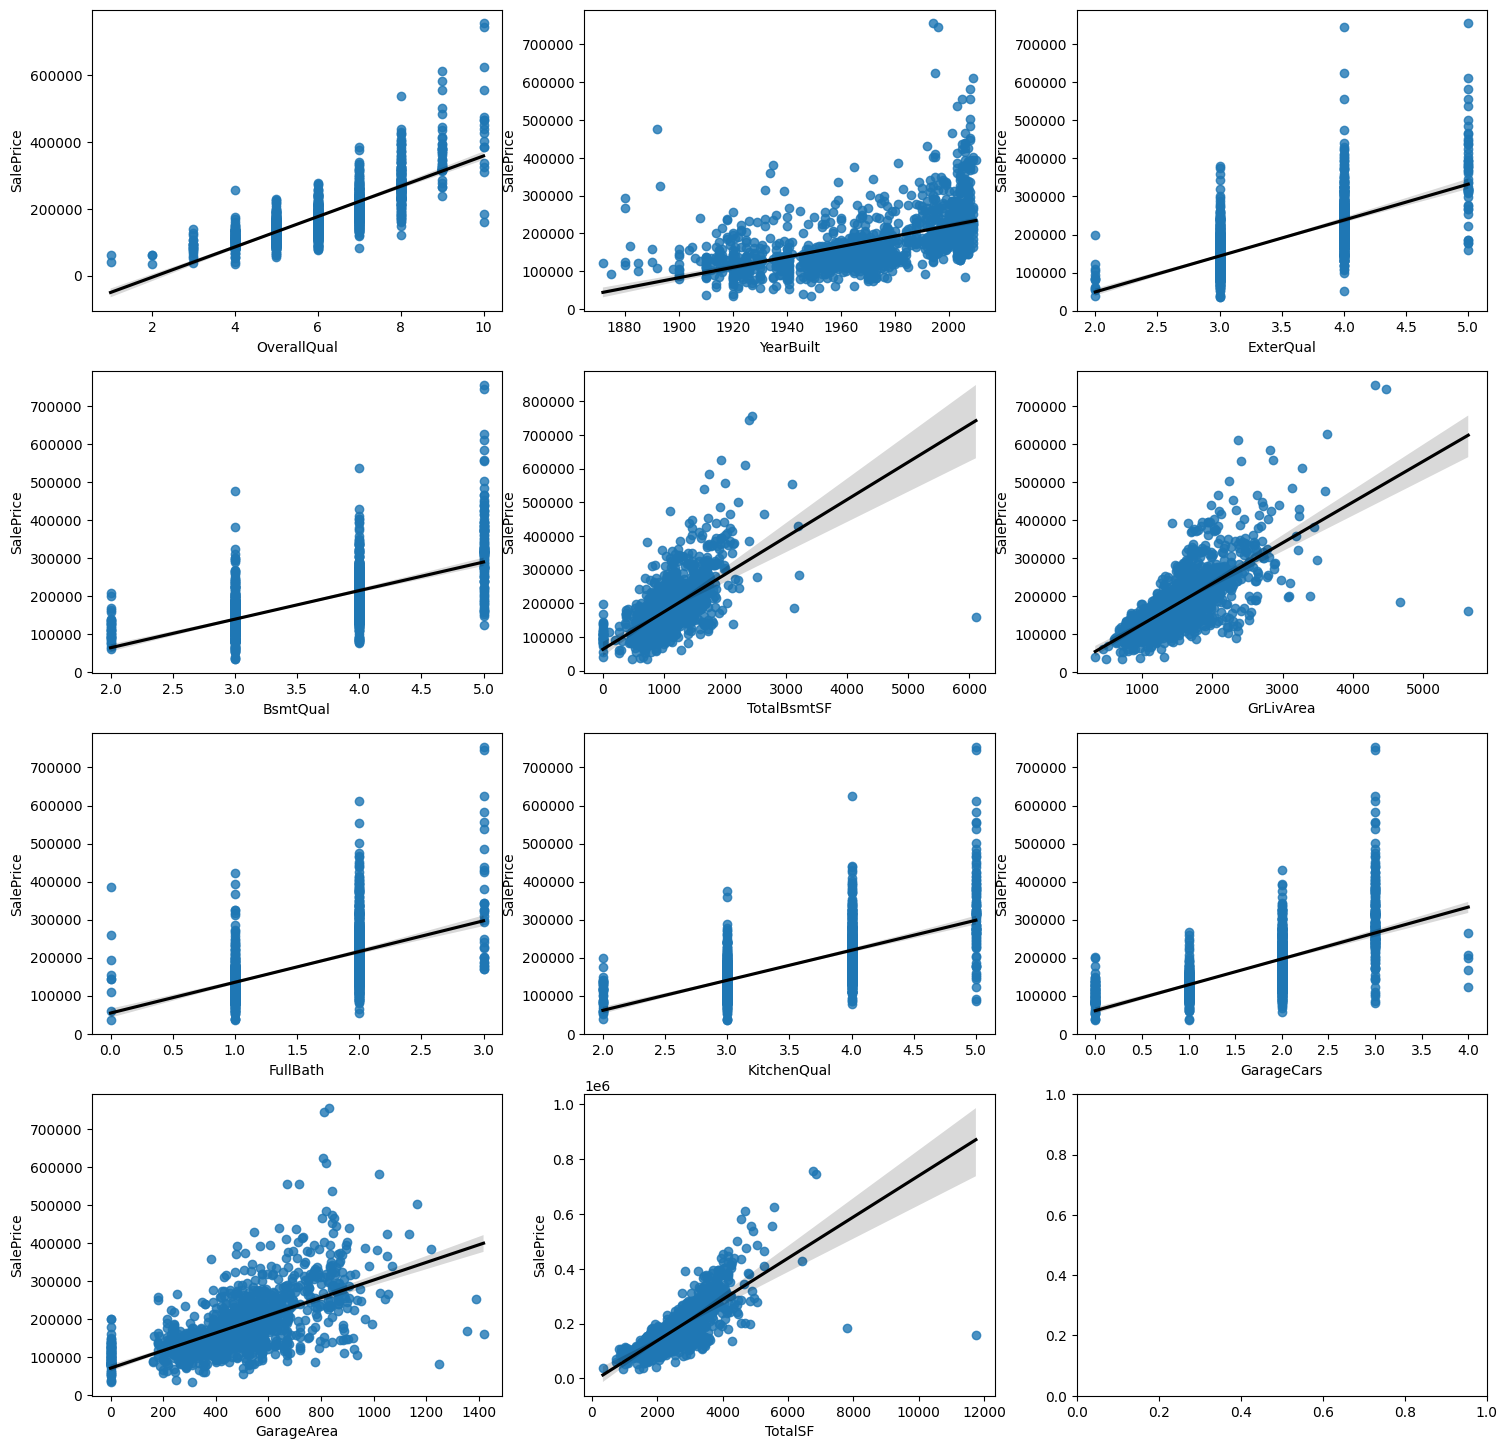

In [11]:
top_corr_features_excl_salesprice = top_corr_features.drop('SalePrice')
fig, ax = plt.subplots(round(len(top_corr_features_excl_salesprice) / 3), 3, figsize = (18, 18))
for i, ax in enumerate(fig.axes):
    if i < len(top_corr_features_excl_salesprice) - 1:
        sns.regplot(x=top_corr_features_excl_salesprice[i],y='SalePrice', data=df_first_transform[top_corr_features], ax=ax, line_kws={'color': '#000000'})

As we can see above, each scatterplot has a positive slope in the linear regression (black line), so, as we said before, **for greater values of each feature, the greater value for the sale price**.

Let's get some more insights. Let's plot the histogram of these previous features and the main statistical metrics:

array([[<AxesSubplot: title={'center': 'OverallQual'}>,
        <AxesSubplot: title={'center': 'YearBuilt'}>,
        <AxesSubplot: title={'center': 'ExterQual'}>,
        <AxesSubplot: title={'center': 'BsmtQual'}>],
       [<AxesSubplot: title={'center': 'TotalBsmtSF'}>,
        <AxesSubplot: title={'center': 'GrLivArea'}>,
        <AxesSubplot: title={'center': 'FullBath'}>,
        <AxesSubplot: title={'center': 'KitchenQual'}>],
       [<AxesSubplot: title={'center': 'GarageCars'}>,
        <AxesSubplot: title={'center': 'GarageArea'}>,
        <AxesSubplot: title={'center': 'SalePrice'}>,
        <AxesSubplot: title={'center': 'TotalSF'}>],
       [<AxesSubplot: title={'center': 'Total_Bathrooms'}>,
        <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

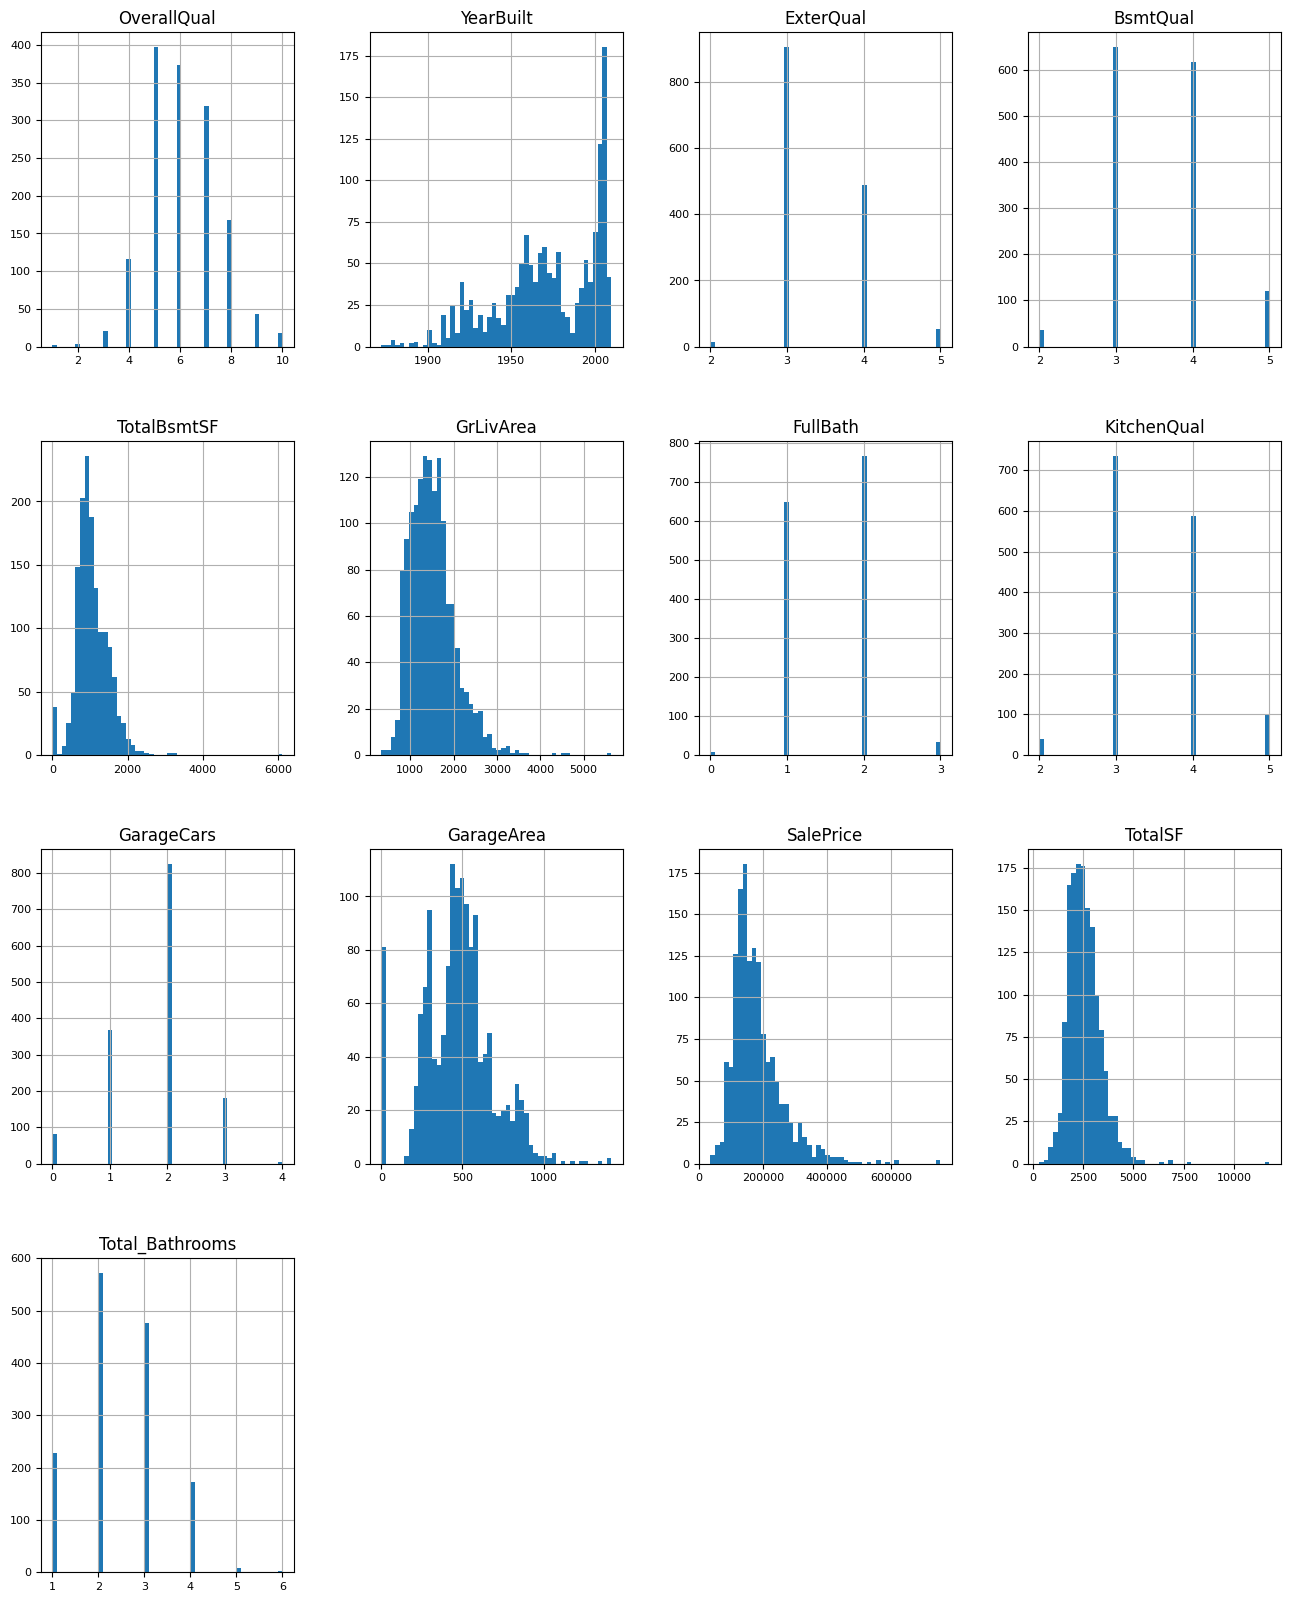

In [12]:
df_first_transform[top_corr_features].hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [13]:
df_first_transform[top_corr_features].describe()

,OverallQual,YearBuilt,ExterQual,BsmtQual,TotalBsmtSF,GrLivArea,FullBath,KitchenQual,GarageCars,GarageArea,SalePrice,TotalSF,Total_Bathrooms
count,1460.000000,1460.000000,1460.00000,1423.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,6.099315,1971.267808,3.39589,3.579761,1057.429452,1515.463699,1.565068,3.511644,1.767123,472.980137,180921.195890,2572.893151,2.430822
std,1.382997,30.202904,0.57428,0.680602,438.705324,525.480383,0.550916,0.663760,0.747315,213.804841,79442.502883,823.598492,0.922647
min,1.000000,1872.000000,2.00000,2.000000,0.000000,334.000000,0.000000,2.000000,0.000000,0.000000,34900.000000,334.000000,1.000000
25%,5.000000,1954.000000,3.00000,3.000000,795.750000,1129.500000,1.000000,3.000000,1.000000,334.500000,129975.000000,2014.000000,2.000000
50%,6.000000,1973.000000,3.00000,4.000000,991.500000,1464.000000,2.000000,3.000000,2.000000,480.000000,163000.000000,2479.000000,2.000000
75%,7.000000,2000.000000,4.00000,4.000000,1298.250000,1776.750000,2.000000,4.000000,2.000000,576.000000,214000.000000,3008.500000,3.000000
max,10.000000,2010.000000,5.00000,5.000000,6110.000000,5642.000000,3.000000,5.000000,4.000000,1418.000000,755000.000000,11752.000000,6.000000


With the histogram and the principal statistical metrics of the main numerical features, we can tell the big picture of the houses that have been sold:
1. The **quality** of the houses sold are **medium-high**. They score 5-7 over 10 for the overall quality and 3-4 over 5 for exterior material and basement qualities.
2. We can appreciate that that houses that have been sold are from the **last years of construction**.
3. The size of the houses are around the **2000 and 3000 sq**. 
4. The number of bathrooms are 2-3 and the garage has a capacity for 2 cars.

<a id='EDAC'></a>
## Exploratory Data Analysis of SalePrice for categorical features

As we've done before, let's pick a few important categorical features for the price sale and let's try to get some insights of them. This time the criterion I have chosen has been my own knowledge of what characteristics might be important in predicting the value of a house. From the data_description file I've picked these 5 features:

- **MSZoning** (Identifies the general zoning classification of the sale.)
- **Neighborhood** (Physical locations within Ames city limits)
- **BldgType** (Type of dwelling)
- **HouseStyle** (Style of dwelling)
- **Foundation** (Type of foundation)

Let's get a detailed view of each one:

#### MSZoning

Acronym and values:
- A: Agriculture
- C: Commercial
- FV: Floating Village Residential
- I: Industrial
- RH: Residential High Density
- RL: Residential Low Density
- RP: Residential Low Density Park 
- RM: Residential Medium Density

Let's start doing a histogram to check the main category:

<AxesSubplot: xlabel='MSZoning', ylabel='Count'>

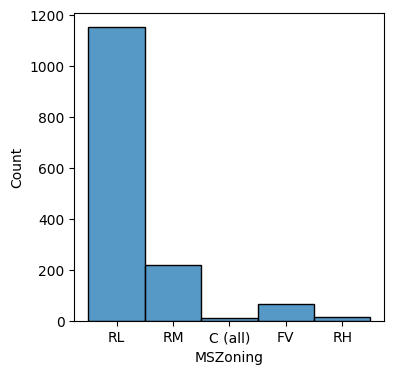

In [14]:
plt.figure(figsize=(4,4))
sns.histplot(df_first_transform["MSZoning"])

Let's see if there are price difference between them using a boxplot:

<AxesSubplot: xlabel='SalePrice', ylabel='MSZoning'>

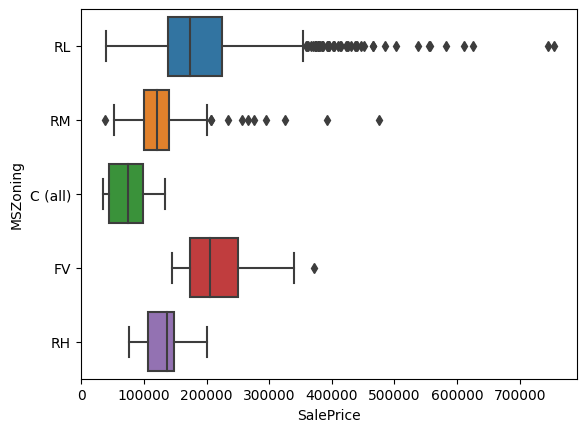

In [15]:
sns.boxplot(data=df_first_transform, y="MSZoning", x="SalePrice")

As we can see above, the majority of houses sold are in a residential zone with low density. It seems that from more expensive to less expensive we have the following zones: floating village, residential zone with low density, then very similar we have residential zone with medium and high density and finally we have commercial zones. Although the floating village is, in general, more expensive that the low density residential, we can notice that there are quite a lot outliers for high prices in this type of residential.

#### Neighborhood

As we've done previous, let's plot a histogram to check if there are top neighborhood:

<AxesSubplot: >

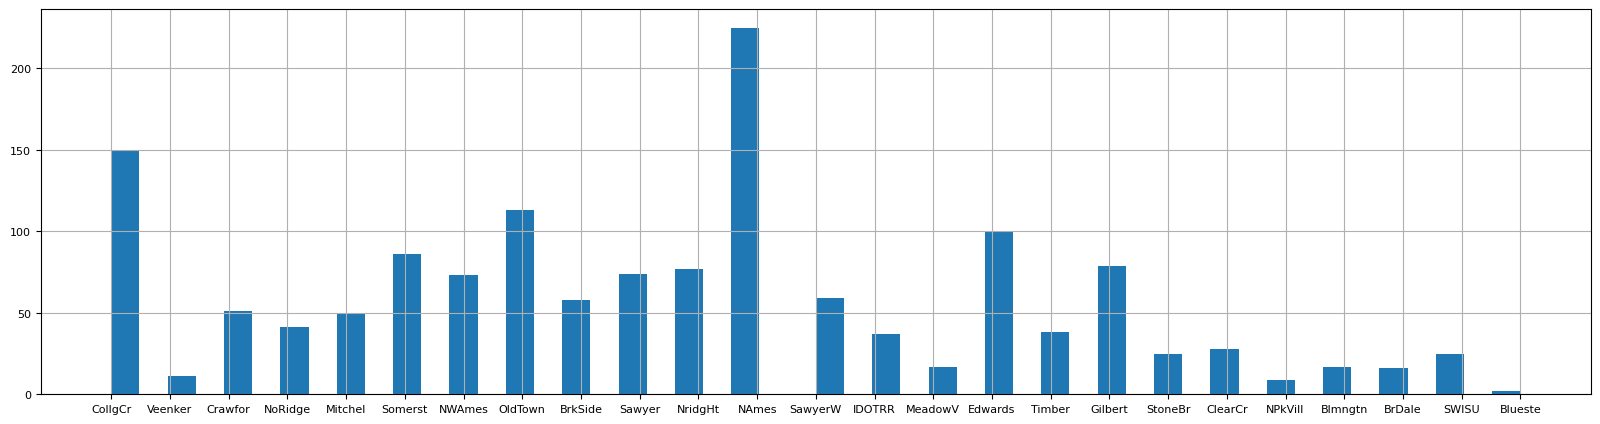

In [16]:
df_first_transform["Neighborhood"].hist(figsize=(20, 5), bins=50, xlabelsize=8, ylabelsize=8)

<AxesSubplot: xlabel='SalePrice', ylabel='Neighborhood'>

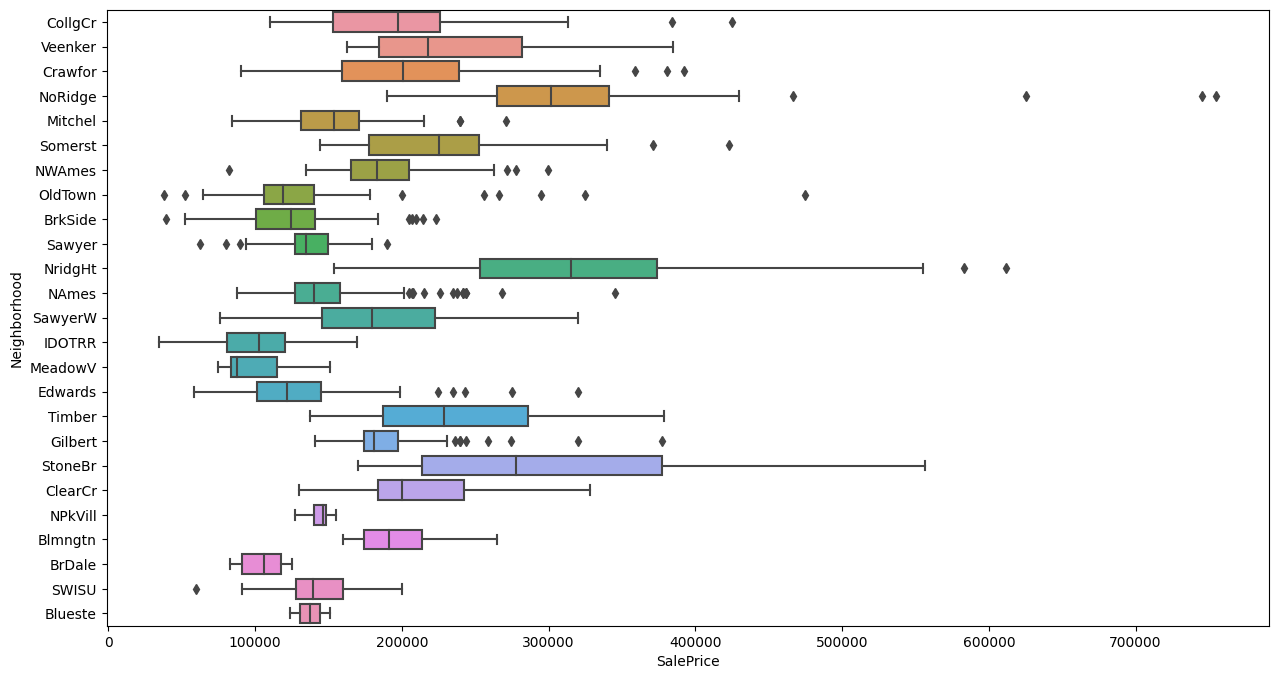

In [17]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df_first_transform, y="Neighborhood", x="SalePrice")

As we could imagine, the neighborhood is a feature with a direct impact on the price sale. As we can see above, the boxplots are very different from one neighborhood to another. The most expensive neighborhood seems to be Northridge Heights (NridHt) and Northridge Heights (StoneBr) and the cheaper ones are Briardale (BrDale), Meadow Village (MeadowV) and Iowa DOT and Rail Road (IDOTRR). The top bought neighborhoods are: North Ames (NAmes) and College Creek (CollgCr).

#### Building Type (BldgType)

Acronym and values:
- 1Fam: Single-family Detached
- 2FmCon: Two-family Conversion; originally built as one-family dwelling
- Duplx: Duplex
- TwnhsE:Townhouse End Unit
- TwnhsI: Townhouse Inside Unit

<AxesSubplot: xlabel='BldgType', ylabel='Count'>

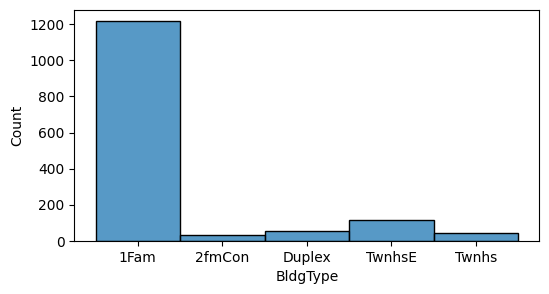

In [18]:
plt.figure(figsize=(6,3))
sns.histplot(df_first_transform["BldgType"])

<AxesSubplot: xlabel='SalePrice', ylabel='BldgType'>

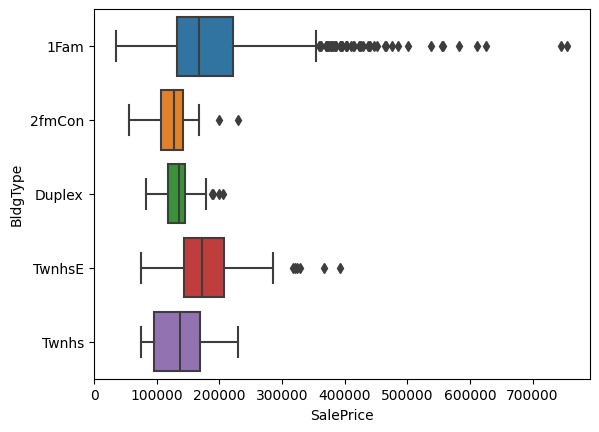

In [19]:
sns.boxplot(data=df_first_transform, y="BldgType", x="SalePrice")

The single-family detached home is the type of home most bought and also is the most expensive in general.

#### Foundation

Acronym and values:

- BrkTil: Brick & Tile
- CBlock: Cinder Block
- PConc: Poured Contrete
- Slab: Slab
- Stone: Stone
- Wood: Wood

<AxesSubplot: xlabel='Foundation', ylabel='Count'>

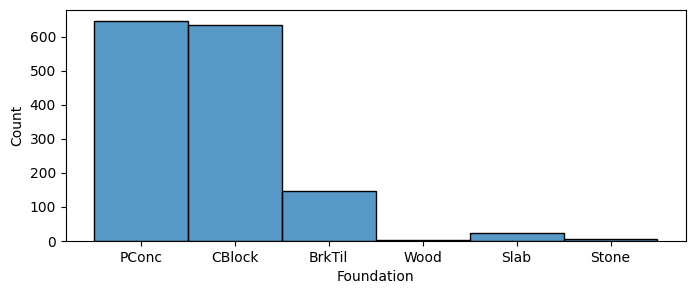

In [20]:
plt.figure(figsize=(8,3))
sns.histplot(df_first_transform["Foundation"])

<AxesSubplot: xlabel='SalePrice', ylabel='Foundation'>

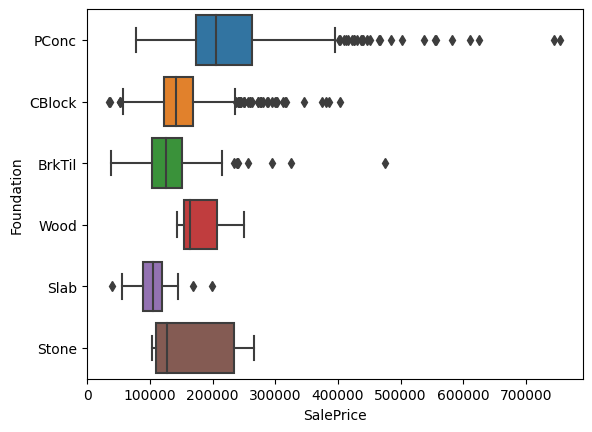

In [21]:
sns.boxplot(data=df_first_transform, y="Foundation", x="SalePrice")

The main type of foundations are Brick & Tile and Cinder Block, the first one is way more expensive.

<a id='SEED'></a>
## Seed questions to understand better the data and its peculiarities

### Is there any old data?
Let's check if we have recent data sales, otherwise, due the inflation the prices we'll try to predict may be not accurate.

In [22]:
df_first_transform[["YrSold"]].agg(['min','max'])

,YrSold
min,2006
max,2010


The dataset only contains data about 5 years of difference, from 2006 to 2010. There isn't a huge difference in years, so we don't have to delete old data that could affect to our price prediction.

### Is there a comparable selling price for the same main features?
From the previous analysis of more important features correlated to the price, let's group by those features and let's check how different is the price in each group. We're going to create the groups using this features:
- OverallQual
- TotalSF (because is a continuous variable we'll have to create buckets of 200 sq length)
- Total_Bathrooms
- GarageCars
- Neighborhood
- MSZoning 
- BldgType
- Foundation

To check how different can be the price in each group, we'll see how dispersed the data is in relation to the mean, so we'll use the Standard Desvitation (std) metric. 

In the following chunk, you we'll see the data group by the previous features and ordered by the std:

In [23]:
length_bins = 200
bins_total_SF = pd.cut(df_first_transform.TotalSF, np.arange(df_first_transform.TotalSF.min(),df_first_transform.TotalSF.max(),length_bins))
groupby = df_first_transform.groupby(["OverallQual", bins_total_SF, "Total_Bathrooms", "GarageCars", "Neighborhood", "MSZoning", "BldgType", "Foundation"])
groupby_metrics = groupby[["SalePrice"]].describe().sort_values(by=('SalePrice','std'), ascending = False)
groupby_metrics.head(5)

SalePrice  \
                                                                                                  count   
OverallQual TotalSF      Total_Bathrooms GarageCars Neighborhood MSZoning BldgType Foundation             
8           (3934, 4134] 3               3          NridgHt      RL       1Fam     PConc            2.0   
9           (4534, 4734] 4               3          NridgHt      RL       1Fam     PConc            3.0   
8           (3134, 3334] 4               2          Crawfor      RM       TwnhsE   PConc            3.0   
            (3934, 4134] 4               3          NoRidge      RL       1Fam     PConc            2.0   
7           (2734, 2934] 2               2          NWAmes       RL       1Fam     CBlock           2.0   

                                                                                                              \
                                                                                                        mean   
OverallQual TotalSF      Total_Bathrooms GarageCars Neighborhood MSZoning BldgType Foundation                  
8           (3934, 4134] 3               3          NridgHt      RL       1Fam     PConc       346646.500000   
9           (4534, 4734] 4               3          NridgHt      RL       1Fam     PConc       543914.666667   
8           (3134, 3334] 4               2          Crawfor      RM       TwnhsE   PConc       300833.333333   
            (3934, 4134] 4               3          NoRidge      RL       1Fam     PConc       358500.000000   
7           (2734, 2934] 2               2          NWAmes       RL       1Fam     CBlock      119750.000000   

                                                                                                              \
                                                                                                         std   
OverallQual TotalSF      Total_Bathrooms GarageCars Neighborhood MSZoning BldgType Foundation                  
8           (3934, 4134] 3               3          NridgHt      RL       1Fam     PConc       132021.785795   
9           (4534, 4734] 4               3          NridgHt      RL       1Fam     PConc        93566.270655   
8           (3134, 3334] 4               2          Crawfor      RM       TwnhsE   PConc        81866.252713   
            (3934, 4134] 4               3          NoRidge      RL       1Fam     PConc        61518.289963   
7           (2734, 2934] 2               2          NWAmes       RL       1Fam     CBlock       52679.455198   

                                                                                                         \
                                                                                                    min   
OverallQual TotalSF      Total_Bathrooms GarageCars Neighborhood MSZoning BldgType Foundation             
8           (3934, 4134] 3               3          NridgHt      RL       1Fam     PConc       253293.0   
9           (4534, 4734] 4               3          NridgHt      RL       1Fam     PConc       437154.0   
8           (3134, 3334] 4               2          Crawfor      RM       TwnhsE   PConc       235000.0   
            (3934, 4134] 4               3          NoRidge      RL       1Fam     PConc       315000.0   
7           (2734, 2934] 2               2          NWAmes       RL       1Fam     CBlock       82500.0   

                                                                                                          \
                                                                                                     25%   
OverallQual TotalSF      Total_Bathrooms GarageCars Neighborhood MSZoning BldgType Foundation              
8           (3934, 4134] 3               3          NridgHt      RL       1Fam     PConc       299969.75   
9           (4534, 4734] 4               3          NridgHt      RL       1Fam     PConc       510043.50   
8           (3134, 3334] 4               2    

Let's plot the value of the std (for those non null values) and we'll see how is distributed:

<AxesSubplot: xlabel='std', ylabel='Count'>

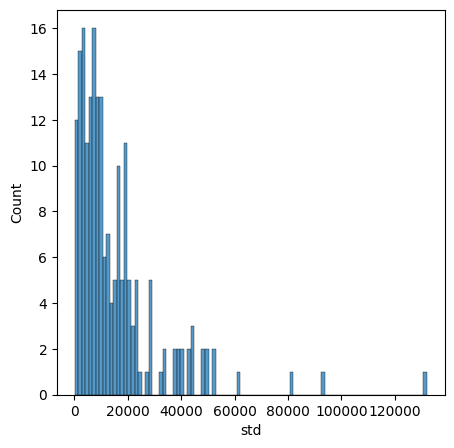

In [24]:
groupby_metrics.reset_index(drop=True, inplace=True)
plt.figure(figsize=(5,5))
sns.histplot(groupby_metrics["SalePrice"]['std'].dropna(), bins=100)

As we can see above, for a large number of groups the Standard Desviation is near 0 and then you can see a few large values of the Std. This could suggest that for most of the house with the same characteristic the price is consistent and we could try to predict with good results. On the other hand, there are a few others houses that the price is not consistent for the same characteristics, this could due because some outliers. We'll check for outliers in a later section.

<a id='SUMMARY'></a>
## Summary of bussiness analytics

In this section we've said many things about this dataset. Let's just summarize all above in the following take aways:

- There are 4 features with more than 80% missing data. In case we were a real state business, it could be interesting to check why is missing this information and if there is any way to retrieve it.
- All high correlation with the sale price feature are positive. This means that a high value of any of these features also has a high value for the sale price and low value of any of these features also has a low value for the sale price.
- The most correlated features with the sale price feature, in order, are: rate of the material qualities of the house, total of square feet, number of bathrooms and the year of construction.
- The rate of the condition of the house is not highly correlated, but it is the rate of the material qualities.
- The big picture of the houses sold in the last 4 years is:
    - Houses with medium-high qualities.
    - Relatively new houses.
    - Around 2000-3000 sq.
    - With 2 bathrooms and a garage for 2 cars.
    - Residencial in a low density zone.
- The more expensive zone is residential with low density and the most expensive neighborhoods are Northridge Heights and Northridge Heights.
- The most bought type of home (and the most expensive) is a single-family detached home. 

<a id='ML'></a>
# Machine Learning

In the previous part of this project, we've had examined a dataset with many features that describe the houses of specific US region. We explored and discovered interesting insights about the real state market and how the features of a house can influence about the selling price of the house. Now, we're moving on to the Machine Learning part of this project.

Our main goal here is to find the best model that could accurately **predict the selling price of a house**, so its market price. Also, in this section we'll clean and transform the data to ease that the data could fit in several models.


<a id='OUTLIERS'></a>
## Outliers

Let's check if there are outliers in our data that we should remove before finding a model that fits our data. 

First of all, let's plot the histogram of out target feature SalePrice:

<AxesSubplot: xlabel='SalePrice', ylabel='Count'>

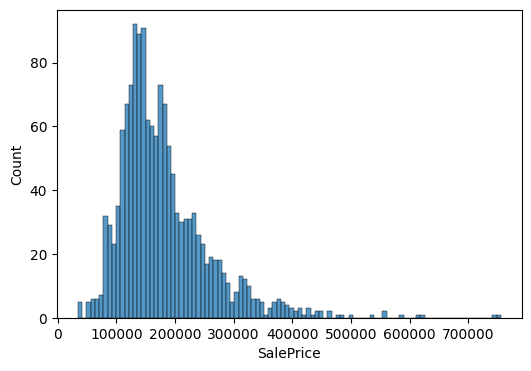

In [25]:
plt.figure(figsize=(6,4))
sns.histplot(df_first_transform['SalePrice'], bins=100)

As we can see above, the distribution of the SalePrice feature seems to be a gaussian distribution positively skewed. Let's find out the skew value:

In [26]:
df_first_transform['SalePrice'].skew()

1.8828757597682129

Because the skew value > 0.5, we can numerically confirm the positively skewed distribution. On the other hand, also in the right side of the distribution, seems to have a long tail. That would confirm the presence of outliers in the right side of the distribution. The kurtosis is the statistical value that measure how long or short are the tails of the distribution. Let's find out its value: 

In [27]:
df_first_transform['SalePrice'].kurtosis()

6.536281860064529

For values >3 of kurtosis we can say that we have a heavy-tailed distribution (Leptokurtic) an this confirm the presence of outliers. [Here](https://www.analyticsvidhya.com/blog/2021/05/shape-of-data-skewness-and-kurtosis/) for more information. We are going to eliminate the outliers to prevent those affecting the results of the model we are going to build. The [method](https://towardsdatascience.com/5-ways-to-detect-outliers-that-every-data-scientist-should-know-python-code-70a54335a623) we're going to use is the z-score:

In [28]:
df_remove_outliers = df_first_transform.copy()
# Define a Z-score threshold (the usual one is 3, we'll set it as 4 to delete only the highest outliers)
z_threshold = 4
# Calculate Z-scores for each column
z_scores = df[['SalePrice']].apply(zscore)
# Differenciate outliers from not outliers
outliers_index = (z_scores.abs() > z_threshold)["SalePrice"]
# Delete the outliers from the dataset
df_remove_outliers = df_remove_outliers[~outliers_index]

print("The outliers removed are the following:\n")
df_first_transform[outliers_index].sort_values(by="SalePrice", ascending = False)

The outliers removed are the following:



,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF,Total_Bathrooms
691,60,RL,104.0,21535,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,1,2007,WD,Normal,755000,6760,5
1182,60,RL,160.0,15623,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,555,0,7,2007,WD,Abnorml,745000,6872,5
1169,60,RL,118.0,35760,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,0,7,2006,WD,Normal,625000,5557,5
898,20,RL,100.0,12919,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,3,2010,New,Partial,611657,4694,4
803,60,RL,107.0,13891,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,192,0,0,1,2009,New,Partial,582933,4556,4
1046,60,RL,85.0,16056,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,7,2006,New,Partial,556581,4860,4
440,20,RL,105.0,15431,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,170,0,0,4,2009,WD,Normal,555000,5496,3
769,60,RL,47.0,53504,Pave,IR2,HLS,AllPub,CulDSac,Mod,...,210,0,0,6,2010,WD,Normal,538000,4929,5
178,20,RL,63.0,17423,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,0,7,2009,New,Partial,501837,4450,3


Above, the deleted 9 outliers from the right tail, now the distribution of the SalePrice feature is the following:

<AxesSubplot: xlabel='SalePrice', ylabel='Count'>

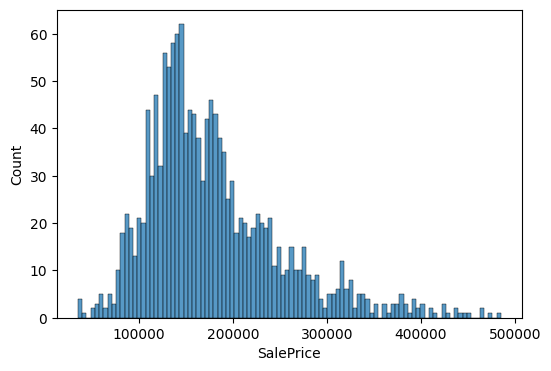

In [29]:
plt.figure(figsize=(6,4))
sns.histplot(df_remove_outliers['SalePrice'], bins=100)

<a id='TRANSFORMCAT'></a>
## Transform categorical variables to numerical


There are ml algorithms that only work with numerical data, for that reason we need to transform our category features into numerical features. We'll use numerical imputation with ordinal features, where exist an order in the possible values of the feature, for example ratings, size classifications, educational levels, etc. For nominal variables we'll use one hot encoding. For more info [here](https://medium.com/@brandon93.w/converting-categorical-data-into-numerical-form-a-practical-guide-for-data-science-99fdf42d0e10).

### Ordinal features
The ordinal inputation has been done in [this](#FFE) section

### Nominal features

Let's check with nominals features we have:

In [30]:
df_numerical = df_remove_outliers.copy()
df_numerical.select_dtypes('object').columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical',
       'Functional', 'GarageType', 'SaleType', 'SaleCondition'],
      dtype='object')

Let's use **dummy encoding** to encode the rest of categorical features. First, let's input an 'unknown' value for those nan values:

In [31]:
#Input 'unknown' value to the features we want to apply one hot encoding
df_numerical[df_numerical.select_dtypes('object').columns] = df_numerical[df_numerical.select_dtypes('object').columns].fillna('unknown')
#Apply dummy encoding
df_numerical = pd.get_dummies(df_numerical, columns=df_numerical.select_dtypes('object').columns )

<a id='NULL'></a>
## Input missing values

Let's refresh how much values we have null:

In [32]:
total_null_values = df_numerical.isna().sum().sort_values(ascending = False)
perc_null_values = round(df_numerical.isna().sum().sort_values(ascending = False)/len(df_numerical)*100,2)
total_null_values = total_null_values.to_frame(name="count_nulls")
perc_null_values = perc_null_values.to_frame(name="perc_null")
df_null_values = pd.concat([total_null_values, perc_null_values], axis=1)
df_null_values.head(15)

,count_nulls,perc_null
FireplaceQu,690,47.55
LotFrontage,259,17.85
GarageQual,81,5.58
GarageFinish,81,5.58
GarageYrBlt,81,5.58
GarageCond,81,5.58
BsmtFinType2,38,2.62
BsmtExposure,38,2.62
BsmtQual,37,2.55
BsmtFinType1,37,2.55


We have 12 features with null values. Because there are libraries like sckitlearn that don't allow null values, let's **input a value to this nulls**. This can be approached by simple methods. For categorical features, we can input the mode and for numerical features, the mean or the median. This time we'll use a ML approach using **K Nearest Neighbours**.

In [33]:
from sklearn.impute import KNNImputer
df_inputed_nulls = df_numerical.copy()
knn_imputer = KNNImputer()
X = knn_imputer.fit_transform(df_inputed_nulls)
df_inputed_nulls = pd.DataFrame(X, columns = df_inputed_nulls.columns)

In [34]:
df_inputed_nulls.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,4.0,3.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,3.0,3.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,4.0,3.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,3.0,3.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,4.0,3.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [35]:
#Check we don't have any null in the dataframe
df_inputed_nulls.isnull().values.any()

False

There's no nulls left and all features are numerical, so we could use this dataset in the case that the model/library we'll try on demands a numerical and non null data.

<a id='SPLIT'></a>
## Split training and test data

In [36]:
df_numerical_no_nulls = df_inputed_nulls.copy()
X_numerical_no_nulls = df_numerical_no_nulls.dropna().drop(columns=['SalePrice']).values
y_numerical_no_nulls = df_numerical_no_nulls.dropna()['SalePrice'].values

X_train, X_test, y_train, y_test = train_test_split(X_numerical_no_nulls, y_numerical_no_nulls, test_size=0.3, random_state=1)

In [37]:
df_results = pd.DataFrame()  # Here we'll store the performance metrics of each model

In [38]:
X_train.shape

(1015, 230)

### Compare data in training and test dataset

It's important to check if train and test data are similar in order to guarantee that we can rely on our metrics performance in the test and training set. The goal in every ML problem is being able to generalize with good results the model we've trained with unseen data (the test set). That's why we have to check that training and test data are similar, because otherwise if they are different we can't expect them to have good and similar metrics performance, even the training data has good performance metrics.

First of all, let's compare that in both datasets we have the same proportion of the positive target class:

In [39]:
abs(y_train.mean()-y_test.mean())


712.9703597415064

As we can see above, the difference between the two mean prices are very low (below 1000$), so we can be sure that for the target feature, the training and the test dataset are similar.

Secondly, compare all the principal statistic metrics for the other features:

In [40]:
df_X_train  = pd.DataFrame(data=X_train, columns=df_numerical_no_nulls.columns.drop('SalePrice'))
df_X_test  = pd.DataFrame(data=X_test, columns=df_numerical_no_nulls.columns.drop('SalePrice'))
describe_X_train = df_X_train.describe().T
describe_X_test = df_X_test.describe().T
abs(describe_X_train.sub(describe_X_test).iloc[:,1:]).sort_values(by='mean', ascending = False).head(25)  # Substract the metrics for each feature

,mean,std,min,25%,50%,75%,max
LotArea,94.921173,613.270709,191.0,59.50,383.0,427.50,56245.0
GrLivArea,15.746138,15.273485,146.0,14.00,33.5,44.50,966.0
BsmtFinSF1,14.476667,12.376460,0.0,0.00,26.0,26.25,3384.0
MasVnrArea,13.198321,12.592640,0.0,0.00,0.0,9.25,471.0
TotalBsmtSF,10.667422,4.286352,0.0,9.00,8.5,63.75,2910.0
2ndFlrSF,10.517804,7.238467,0.0,0.00,0.0,8.50,207.0
GarageArea,9.861420,7.257330,0.0,9.50,8.5,11.75,28.0
MiscVal,5.820423,62.829722,0.0,0.00,0.0,0.00,7200.0
EnclosedPorch,5.602278,5.416604,0.0,0.00,0.0,0.00,259.0
TotalSF,5.078716,35.829846,386.0,42.25,20.0,13.50,3938.0


The difference between the principals statistic metrics of training and test dataset are low or near or equally 0, so we can be sure that the training and the test dataset are similar enough to generalize the results of the model in unseen data.

<a id='METRIC'></a>
## Performance Metric

For this regression problem we'll be using these following two performance metrics:

 - **RMSLE** (Root mean squared error). This metric is the root of MSE, which is the mean of all the squared differences between the real value and the predicted one. This metric is interesting because is in the same unit that the target feature, so easily interpretable. It is a differentiable function, which is pretty important for the optimization algorithms during training. On the other hand, this metric is more sensitive to outliers that others metrics as MAE. In this project, we've already removed the most important outliers so this shouldn't be a huge problem.
 - **R2** (Coefficient of determination). This metric tries to measure how good or how bad is the model respect to a model that always returns the mean of the target. This metric is upper bounded by 1, and for R2 values near 1 it means that our model is far much better that the mean estimator. For values around 0, means that our model performs likewise the mean estimator. This metric is not lower bounded.
 
We'll be using both metrics to check how the trained models are performing.

In [41]:
# Define error metrics
def RMSE(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

<a id='MODELS'></a>
## Models

In this section, we'll try to find a model able to predict the house price sale based on all the features. To do so, we'll use a hyperparameter tuning and a cross validation. 

We'll use 10 folds for cross validation and we'll use the GridSearchCV for the hyperparameter tunning.

In [42]:
# Setup cross validation folds
kf = KFold(n_splits=10, random_state=42, shuffle=True)

<a id='SVM'></a>
### **SVM**

Support vector machine model is commonly used for classification problems, but also can be used for regression and its called SVR. The main idea of SVR is to fit our data with a hyperplane. It could be very possible that our data is not linear, so SVM can also **transform the data into a greater dimension** (with a kernel function) in order to **find a hyperplane** that is able to fit data in this new dimension.

Similar to SVM for classification, to find this hyperplane this model uses support vectors, which are those instances that fall in an epsilon "tube". This **epsilon-tube** (which is a parameter) measures how much we can tolerate the errors in the prediction, because for the instances that fall in this tube there is no error, for that reason, it's also called epsilon-insensitive tube (this tube can be more or less width depending on the problem error tolerance). The model is trained to minimize the differences between the actual and predicted value within the specified epsilon-insensitive tube

Another important parameter for this model is the **'C' parameter**, which is a regularization parameter that controls the trade-off between training error and model complexity: for a smaller 'C' we can get more training error, but we generalise better, for greater 'C' we get the opposite.

This model is effective when we have a **high number of features**, that is because the curse of dimensionality works in our favor, because when the dimensionality grows also grows the sparsity and the distance between our data, so it could be easier to find a hyperplane that fit our data.

Support vector machine works better with **standardized data**, that's why we'll create a pipeline that includes the standardization of the data as a first step of a grid search hiperparameter tunning.

For more information [here](https://towardsdatascience.com/an-introduction-to-support-vector-regression-svr-a3ebc1672c2) and [here](https://medium.com/it-paragon/support-vector-machine-regression-cf65348b6345).

In [43]:
%%time
pipeline_svm = Pipeline([ ( "scaler" , StandardScaler()),
                       ("svc",SVC())])
param_grid_svc = {'svc__C': [1,10,100], #Regularization parameter. 
                  'svc__gamma': [0.01,0.001,0.0001,0.00005], #Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’
                  'svc__kernel': ['rbf', 'poly', 'sigmoid','linear']}
grid_pipeline_svc = GridSearchCV(pipeline_svm,param_grid_svc, n_jobs=-1, cv = kf, verbose = 10)
grid_pipeline_svc.fit(X_train,y_train)
print("Best params:\n")
print(grid_pipeline_svc.best_params_)

Fitting 10 folds for each of 48 candidates, totalling 480 fits
Best params:

{'svc__C': 1, 'svc__gamma': 0.01, 'svc__kernel': 'poly'}
CPU times: total: 3.45 s
Wall time: 2min 16s


In [44]:
pred_grid_pipeline_svc = grid_pipeline_svc.predict(X_test)
svc_df = pd.DataFrame(data=[RMSE(y_test, pred_grid_pipeline_svc),r2_score(y_test, pred_grid_pipeline_svc)],
             columns=['SVC Score'],
             index=["RMSE", "R2"])
print(svc_df)
df_results = pd.concat([df_results,svc_df.T])

         SVC Score
RMSE  55511.432899
R2        0.452671


<a id='DF'></a>
### **Decision forests**

Decision forests are a type of model made of multiple decision trees. There are different ways to **ensemble multiple decision trees** and there are two types of decision forest:
- **Random Forest**: is an ensemble of decision trees in which each decision tree is trained with a specific **random noise**.
- **Gradient boosting machines** (GBM): is an ensemble of two types of model: a weak one and strong one. This model is made in an iterative way: in each step the weak model is trained to predict the error of the strong one and then this weak model is added to the strong one to reduce its the error in each iteration.

In tree algorithms, the value of the feature does not matter, but the order of the values, that's why in these models the **standardization of the data is not necessary** and in this section we won't standardize the data.

Finally, these models can be used for classification and regression and they are **robust to noisy data**, have interpretable properties and  are well suited for training on **small datasets**, or on datasets where the ratio of number of features / number of examples is high. 



[Here](https://developers.google.com/machine-learning/decision-forests?hl=en) for more information about trees and decision forests.

#### **GBM**

##### **XGBoost**

In [45]:
params_grid_xgb = {
    'n_estimators' : [550,600,650,700],
    'max_depth': [2,3,4,5,6,7]}
xgb = XGBRegressor(n_jobs= -1)

In [46]:
%%time
grid_xgb = GridSearchCV(xgb, params_grid_xgb, n_jobs=-1, cv=kf, verbose=1)
grid_xgb.fit(X_train, y_train)
print("Best params:\n")
print(grid_xgb.best_params_)

Fitting 10 folds for each of 24 candidates, totalling 240 fits
Best params:

{'max_depth': 5, 'n_estimators': 600}
CPU times: total: 13.5 s
Wall time: 1min 56s


In [47]:
pred_grid_pipeline_xgb = grid_xgb.predict(X_test)
xgb_df = pd.DataFrame(data=[RMSE(y_test, pred_grid_pipeline_xgb),r2_score(y_test, pred_grid_pipeline_xgb)],
             columns=['XGB Score'],
             index=["RMSE", "R2"])
print("Performance metrics:\n")
print(xgb_df)
df_results = pd.concat([df_results,xgb_df.T])

Performance metrics:

         XGB Score
RMSE  22903.288331
R2        0.906829


##### **LightGBM**

In [48]:
params_grid_lightgmb = {
    'boosting_type':['gbdt','dart','rf'],
    'max_depth':[4,5,6,7,8,9],
    'num_leaves':[8,10,11,12,13,14]}
lightgbm = LGBMRegressor(n_jobs= -1,verbose=0)

In [49]:
%%time
grid_lightgmb = GridSearchCV(lightgbm, params_grid_lightgmb, n_jobs=-1, cv=kf, verbose=0)
grid_lightgmb.fit(X_train, y_train)
print("Best params:\n")
print(grid_lightgmb.best_params_)

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Best params:

{'boosting_type': 'gbdt', 'max_depth': 8, 'num_leaves': 11}
CPU times: total: 5.95 s
Wall time: 58.1 s


In [50]:
pred_grid_pipeline_lightgmb = grid_lightgmb.predict(X_test)
lightgmb_df = pd.DataFrame(data=[RMSE(y_test, pred_grid_pipeline_lightgmb),r2_score(y_test, pred_grid_pipeline_lightgmb)],
             columns=['Lightgmb Score'],
             index=["RMSE", "R2"])
print("Performance metrics:\n")
print(lightgmb_df)
df_results = pd.concat([df_results,lightgmb_df.T])

Performance metrics:

      Lightgmb Score
RMSE    21965.389512
R2          0.914304


##### **CatBoost**

This model allows us to train with categorical and missing data, so for this model we'll use the version of our dataset prior to transforming out categorical features and inputting them a numerical value to the nulls:

In [51]:
df_modeling_categorical = df_remove_outliers.copy()

categorical_columns = df_modeling_categorical.select_dtypes(include=['object']).columns.tolist()
df_modeling_categorical[categorical_columns] = df_modeling_categorical[categorical_columns].fillna('NaN')
cat_indexes = df_modeling_categorical.columns.get_indexer(categorical_columns)

X_cat = df_modeling_categorical.drop(columns=['SalePrice']).values
y_cat = df_modeling_categorical['SalePrice'].values

X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(X_cat, y_cat, test_size=0.3, random_state=81)

In [52]:
params_catboost = {
                  'iterations': [250,300,350,400]
                 }
catBoost = CatBoostRegressor(random_state=42, verbose = 0, cat_features=cat_indexes)

In [53]:
%%time
grid_catBoost= GridSearchCV(catBoost, params_catboost, n_jobs=-1, cv=kf, verbose=1)
grid_catBoost.fit(X_train_cat, y_train_cat)
print("Best params:\n")
print(grid_catBoost.best_params_)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
Best params:

{'iterations': 350}
CPU times: total: 43.5 s
Wall time: 3min 38s


In [54]:
pred_grid_pipeline_catBoost = grid_catBoost.predict(X_test_cat)
catBoost_df = pd.DataFrame(data=[RMSE(y_test_cat, pred_grid_pipeline_catBoost),r2_score(y_test_cat, pred_grid_pipeline_catBoost)],
             columns=['catBoost Score'],
             index=["RMSE", "R2"])
print("Performance metrics:\n")
print(catBoost_df)
df_results = pd.concat([df_results,catBoost_df.T])

Performance metrics:

      catBoost Score
RMSE    19111.318220
R2          0.919822


#### **Random Forest**

In [55]:
params_random_forest = {
    'n_estimators': [100,120,200],
    'max_depth': [15,17,19],
    'min_samples_leaf': [2,3,4,5,6]
        }
rfc = RandomForestRegressor(n_jobs= -1)

In [56]:
%%time
grid_random_forest = GridSearchCV(rfc, params_random_forest, n_jobs=-1, cv=kf, verbose=1)
grid_random_forest.fit(X_train, y_train)
print("Best params:\n")
print(grid_random_forest.best_params_)

Fitting 10 folds for each of 45 candidates, totalling 450 fits
Best params:

{'max_depth': 19, 'min_samples_leaf': 3, 'n_estimators': 120}
CPU times: total: 10.3 s
Wall time: 8min 2s


In [57]:
pred_grid_pipeline_random_forest = grid_random_forest.predict(X_test)
random_forest_df = pd.DataFrame(data=[RMSE(y_test, pred_grid_pipeline_random_forest),r2_score(y_test, pred_grid_pipeline_random_forest)],
             columns=['Random Forest Score'],
             index=["RMSE", "R2"])
print("Performance metrics:\n")
print(random_forest_df)
df_results = pd.concat([df_results,random_forest_df.T])

Performance metrics:

      Random Forest Score
RMSE         24854.382761
R2               0.890279


<a id='LR'></a>
### **Linear Regressions**

The simple idea behind any linear regression, is trying to fit the data with a hyperplane. In linear regression, we can expect overfitting, especially when the number of observations is low respect the number of features. In that case, exists linear regressions that add regularization terms to the fit in order to make the model simpler and deal with the overfitting. Make the model simpler, is done by penalizing the values of the weight of each feature. Let's see which types of penalizations and linear regressions we'll deal in this project:
- **Simple linear regression**: This model only fits the data by a hyperplane, without any regularization.
- **Ridge linear regression**: This model adds a regularization term that encourage non-informative weights of the model to be towards 0 with a normal distribution. Also, two informative features, nearly identical, would have half of the weight they'd have without ridge normalization. This regularization is also known as L2 regularization.
- **Lasso linear regression**: This model adds a regularization term that encourage non-informative weights to become exactly 0.0. Also, strongly informative features on different scales, informative features strongly correlated with other similarly informative features may have a 0 weight. This regularization is also known as L1 regularization.
- **ElasticNet linear regression**: This model adds two regularization terms, the lasso and the ridge regularization.

[Here](https://developers.google.com/machine-learning/crash-course/regularization-for-simplicity/l2-regularization) for more information about L2 regularization. [Here](https://developers.google.com/machine-learning/crash-course/regularization-for-sparsity/l1-regularization) for more information about L1 regularization. 

Let's try to fit our data to each of these linear regressions:

#### **Simple Linear Regression**

In [58]:
%%time
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

CPU times: total: 78.1 ms
Wall time: 52.5 ms


LinearRegression()

In [59]:
pred_linear_model = linear_model.predict(X_test)
linear_model_df = pd.DataFrame(data=[RMSE(y_test, pred_linear_model),r2_score(y_test, pred_linear_model)],
             columns=['linear model Score'],
             index=["RMSE", "R2"])
print("Performance metrics:\n")
print(linear_model_df)
df_results = pd.concat([df_results,linear_model_df.T])

Performance metrics:

      linear model Score
RMSE        30611.436295
R2              0.833563


#### **Ridge Regression** (L2 Regularization)

In [60]:
%%time
pipeline_ridge = Pipeline([( "scaler" , StandardScaler()),
                       ("ridge",Ridge())])
ridge_params = {'ridge__alpha': [0.1, 1, 10,50,100,150,200,250,350,400,450]}
ridge_grid = GridSearchCV(pipeline_ridge, ridge_params, cv=kf)
ridge_grid.fit(X_train, y_train)
print("Best params:\n")
print(ridge_grid.best_params_)

Best params:

{'ridge__alpha': 250}
CPU times: total: 8.03 s
Wall time: 2.26 s


In [61]:
pred_ridge = ridge_grid.predict(X_test)
ridge_df = pd.DataFrame(data=[RMSE(y_test, pred_ridge),r2_score(y_test, pred_ridge)],
             columns=['Ridge Score'],
             index=["RMSE", "R2"])
print("Performance metrics:\n")
print(ridge_df)
df_results = pd.concat([df_results,ridge_df.T])

Performance metrics:

       Ridge Score
RMSE  26606.641233
R2        0.874263


#### **Lasso Regression** (L1 Regularization)

In [62]:
%%time
pipeline_lasso = Pipeline([
                       ("lasso",Lasso())])
lasso_params = {'lasso__alpha': [0.1, 1, 10,100,150,200,250,300]}
lasso_grid = GridSearchCV(pipeline_lasso, lasso_params, cv=kf)
lasso_grid.fit(X_train, y_train)
print("Best params:\n")
print(lasso_grid.best_params_)

Best params:

{'lasso__alpha': 100}
CPU times: total: 45.9 s
Wall time: 11.5 s


In [63]:
pred_lasso = lasso_grid.predict(X_test)
lasso_df = pd.DataFrame(data=[RMSE(y_test, pred_lasso),r2_score(y_test, pred_lasso)],
             columns=['Lasso Score'],
             index=["RMSE", "R2"])
print("Performance metrics:\n")
print(lasso_df)
df_results = pd.concat([df_results,lasso_df.T])

Performance metrics:

       Lasso Score
RMSE  26290.517656
R2        0.877233


#### **ElasticNet Regression** (L1 and L2 Regularization)

In [64]:
%%time
pipeline_elastic = Pipeline([( "scaler" , StandardScaler()),
                       ("elastic",ElasticNet())])
elasticnet_params = {'elastic__alpha': [0.1, 1, 10], 'elastic__l1_ratio': [0.01, 0.1, 0.5, 0.9]}
elasticnet_grid = GridSearchCV(pipeline_elastic, elasticnet_params, cv=kf)
elasticnet_grid.fit(X_train, y_train)
print("Best params:\n")
print(elasticnet_grid.best_params_)

Best params:

{'elastic__alpha': 1, 'elastic__l1_ratio': 0.5}
CPU times: total: 22.6 s
Wall time: 5.65 s


In [65]:
pred_elasticnet = elasticnet_grid.predict(X_test)
elasticnet_df = pd.DataFrame(data=[RMSE(y_test, pred_elasticnet),r2_score(y_test, pred_elasticnet)],
             columns=['elasticnet Score'],
             index=["RMSE", "R2"])
print("Performance metrics:\n")
print(elasticnet_df)
df_results = pd.concat([df_results,elasticnet_df.T])

Performance metrics:

      elasticnet Score
RMSE      26519.716080
R2            0.875083


<a id='KNN'></a>
### **K-nearest neighbour**

This model can be used for both classification and regression problems. The main idea of this model is to **find the closest 'k' neighbours of an instance**(here you can considerate different metrics distance and different values of 'k'). For classification problems, the output of the instance would be the class with more frequency in their k-neighbours. For regression problems, the output would be the mean of their k-neighbours.

This model is and intuitive and can capture **non linearity** in a simple way. Despite of that, this model is **sensitive to outliers** and is not very efficient when dealing with large datasets. Finally, because of the **curse of dimensionality**, when greater the number of features, the distance between instances is also greater and less meaningful.

Finally, in Knn is also important to **scale the features**. Because the algorithm calculates the distances between instances, if the features we're dealing have very different scale, this could imply that the features with larger scales contribute in larger distances between instances. On the other hand, features with shorter scales contribute in shorter distances. That's why we should our data in the same (standard) scale, in order that all features contribute with the same weight to the distance between instances.

[Here](https://www.analyticsvidhya.com/blog/2018/03/introduction-k-neighbours-algorithm-clustering/) for more information.

In [66]:
grid_param_knn = {
    'knn__n_neighbors':[5,8,9,10,11,12,15,20,25,30,35,40,45,50],
    'knn__weights': ['uniform', 'distance']}      
knn = KNeighborsRegressor(n_jobs=-1)
pipeline_knn = Pipeline([( "scaler" , StandardScaler()),
                       ("knn",knn)])

In [67]:
%%time
grid_knn = GridSearchCV(pipeline_knn, grid_param_knn, n_jobs=-1, cv=kf, verbose=1)
grid_knn.fit(X_train, y_train)
print("Best params:\n")
print(grid_knn.best_params_)

Fitting 10 folds for each of 28 candidates, totalling 280 fits
Best params:

{'knn__n_neighbors': 10, 'knn__weights': 'distance'}
CPU times: total: 1.98 s
Wall time: 7.52 s


In [68]:
pred_grid_pipeline_knn = grid_knn.predict(X_test)
knn_df = pd.DataFrame(data=[RMSE(y_test, pred_grid_pipeline_knn),r2_score(y_test, pred_grid_pipeline_knn)],
             columns=['Knn Score'],
             index=["RMSE", "R2"])
print("Performance metrics:\n")
print(knn_df)
df_results = pd.concat([df_results,knn_df.T])

Performance metrics:

         Knn Score
RMSE  36966.075330
R2        0.757289


<a id='NN'></a>
### **Neural Network**

 A neural network is a model that is able to learn non linear data itself, without the necessity of having to specify manually the non-linearity. This model is represented by different **layers of neurons** connected to each other, which try to imitate the neurons of our brain. Neural networks comprise an input layer, one or more hidden layers, and an output layer. Each layer contains neurons with connections having associated weights. During the training, the model adjusts the **weights between the neurons**. The non-linearity comes from an **activation function** in each one of the neurons, this activation function is a non-linear function and some examples of that are the Relu, Sigmoid, Tanh, etc.
 
In this case, we won't use the package sklearn form training the neural network, instead we'll use a more extended library as **keras**. For the hyperparameter tunning will use a method of the keras library, which the hyperparameters to test are define meanwhile you're creating the NN model. As in the sklearn library, the search of hyperparameters can be performed in several ways: can be performed all the combinations (Gridsearch), can be performed by a random pick of combinations (RandomSearch). Also, there are other methods that improve the efficiency, like HyperBand or Bayesian Optimization. Hyperband tries to improve the RandomSearch by picking randomly hyperparameters using just a few epochs of training, and then it does a full training with the best combinations. On the other hand, in Bayesian Optimization, only the first combinations of hyperparameters are picked randomly, then the algorithm, based on the best results, chooses the next best hyperparameters combinations. In this notebook we'll be using the Hyperband approach with keras.

[Here](https://medium.com/swlh/hyperparameter-tuning-in-keras-tensorflow-2-with-keras-tuner-randomsearch-hyperband-3e212647778f) for more information.


In [69]:
%%time
num_features = X_train.shape[1]

# Define the TensorFlow model for regression with optimizer, activation function,
# number or neurons per layer and learning rate as a hyperparameters
def build_model(hp):
    model = tf.keras.Sequential()
    #Input Layer
    model.add(tf.keras.layers.InputLayer(input_shape=(num_features,)))

    # Hidden Layers
    # First hidden layer
    activation_choice_layer1 = hp.Choice('activation_layer1', values=['relu', 'sigmoid', 'selu','tanh', 'softsign','softplus','softmax'])
    model.add(tf.keras.layers.Dense(units=hp.Int('units_hidden_layer1', min_value=8, max_value=256, step=16),
                                    activation=activation_choice_layer1))
    # Second hidden layer
    activation_choice_layer2 = hp.Choice('activation_layer2', values=['relu', 'sigmoid', 'selu','tanh','softsign','softplus','softmax'])
    model.add(tf.keras.layers.Dense(units=hp.Int('units_hidden_layer2', min_value=8, max_value=256, step=16),
                                    activation=activation_choice_layer2))
    # Add output layer
    model.add(tf.keras.layers.Dense(1))

    # Choice optimizer
    optimizer_choice = hp.Choice('optimizer', values=['adam', 'sgd', 'rmsprop'])
    if optimizer_choice == 'adam':
        optimizer = tf.keras.optimizers.Adam(learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log'))
    elif optimizer_choice == 'sgd':
        optimizer = tf.keras.optimizers.SGD(learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log'))
    else:
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log'))
    
    # Create the NN
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Hyperparameter tunning
tuner = Hyperband( 
    build_model,
    objective='val_loss',
    executions_per_trial=1,
    directory='test19',
    seed = 123
)

# Perform hyperparameter tuning
tuner.search(X_train, y_train, epochs=50,validation_data=(X_test, y_test))

Reloading Tuner from test19\untitled_project\tuner0.json
CPU times: total: 1.59 s
Wall time: 1.95 s


In [70]:
best_hyperparameters = tuner.get_best_hyperparameters(1)[0]
print("Best hyperparameters are:\n")
print(best_hyperparameters.values)
print("\n")
best_model = tuner.get_best_models(num_models=1)
print("Summary best model:\n")
print(best_model[0].summary())
print("\n")

Best hyperparameters are:

{'activation_layer1': 'selu', 'units_hidden_layer1': 184, 'activation_layer2': 'selu', 'units_hidden_layer2': 72, 'optimizer': 'rmsprop', 'learning_rate': 0.0008204040606605068, 'tuner/epochs': 100, 'tuner/initial_epoch': 34, 'tuner/bracket': 1, 'tuner/round': 1, 'tuner/trial_id': '0197'}




Summary best model:

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 184)               42504     
                                                                 
 dense_1 (Dense)             (None, 72)                13320     
                                                                 
 dense_2 (Dense)             (None, 1)                 73        
                                                                 
Total params: 55897 (218.35 KB)
Trainable params: 55897 (218.35 KB)
Non-trainable params: 0 (0.00 Byte)
______

In [71]:
%%time 
# Tune the model with the best hyperparameters
tf.random.set_seed(123) ## to get initial same weights
model = tuner.hypermodel.build(best_hyperparameters)
print("Model summary:\n")
print(model.summary())
history = model.fit(X_train, y_train, epochs=500, validation_data=(X_test, y_test), verbose=0)
print("Model evaluation:\n")
print(model.evaluate(X_test, y_test, verbose = 0))

Model summary:

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 184)               42504     
                                                                 
 dense_4 (Dense)             (None, 72)                13320     
                                                                 
 dense_5 (Dense)             (None, 1)                 73        
                                                                 
Total params: 55897 (218.35 KB)
Trainable params: 55897 (218.35 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None

Model evaluation:

1033499008.0
CPU times: total: 1min 21s
Wall time: 1min 6s


In [72]:
y_pred = model.predict(X_test)
nn_df = pd.DataFrame(data=[RMSE(y_test, y_pred),r2_score(y_test, y_pred)],
             columns=['nn Score'],
             index=["RMSE", "R2"])
print("Performance metrics:\n")
print(nn_df)
df_results = pd.concat([df_results,nn_df.T])

14/14 [==============================] - 0s 2ms/step
Performance metrics:

          nn Score
RMSE  32148.079796
R2        0.816433


<a id='1MC'></a>
## Model comparison

As you can see in the next cell, there are all the results for each model we've tried to fit to our data. Our main metricS have been the RMSE and R2, so we'll take the Top 3 performing models taking account their values. For this models, we'll try to increase the model performance using the PCA technique, because we're dealing with a high number of features.

In [73]:
df_results.sort_values(by='R2', ascending=False)

,RMSE,R2
catBoost Score,19111.318220,0.919822
Lightgmb Score,21965.389512,0.914304
XGB Score,22903.288331,0.906829
Random Forest Score,24854.382761,0.890279
Lasso Score,26290.517656,0.877233
elasticnet Score,26519.716080,0.875083
Ridge Score,26606.641233,0.874263
linear model Score,30611.436295,0.833563
nn Score,32148.079796,0.816433
Knn Score,36966.075330,0.757289


<a id='PCA'></a>
## Apply Principal Components Analysis to Top performing models

Principal Components Analysis (PCA) is a method of **reduction dimensionality**. Shouldn't be understood as a feature selection method because the result of PCA is a **linear combination** (principal components) of the original features. The principal idea of this is getting the linear combination with the **maximum variability of the original features**, with the first principal component explaining the most variance, the second explaining the second most, and so on. This is done by transforming the original problem in finding the eigen vector and eigen values of the covariance matrix, because the eigen vectors are the components and the eigen values are the weight of how these vectors explain the variability of the original features. Is useful to use PCA especially when we're dealing with highly correlated features.

An important parameter for PCA is how many principal components we pick. This can be done by using cross-validation, but also there are several rules of thumb to know in advance which could be a good number.  

In this problem, we have a large number of features, so let's try to improve the performance of the top models by **reducing the overfitting** using PCA.

For more information [here](https://builtin.com/data-science/step-step-explanation-principal-component-analysis), [here](https://towardsdatascience.com/principal-component-regression-clearly-explained-and-implemented-608471530a2f) and [here](https://dorukkilitcioglu.com/2018/08/11/pca-decision-tree.html).

### Find the optimal number of components

In this section, we'll take a look to two methods in order to know with how many principal components we should pick in our cross validation process in order to reduce as much as possible the dimensionality of the model and still having high variability explained with these principal components. 

The methods will use are: observing the ratio of explained variance and the Elbow method. [Here](https://towardsdatascience.com/how-to-select-the-best-number-of-principal-components-for-the-dataset-287e64b14c6d) for more information 

#### **Observing the ratio of explained variance**
With this method, we can see how much variance is explained by adding the principal components one by one:

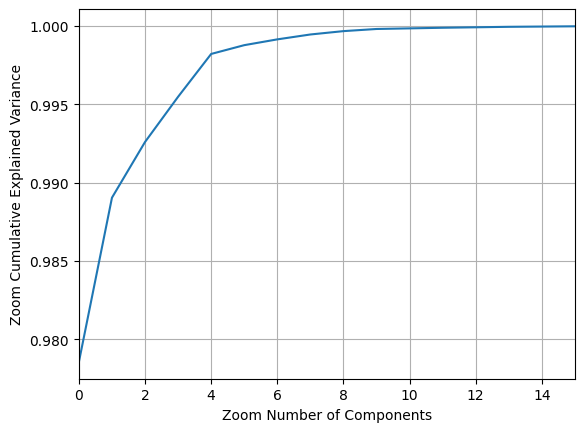

In [74]:
#Apply PCA method to the training data
pca = PCA()
pca.fit(X_train)

# EXPLAINED VARIANCE
# Plot cumulative explained variance against number of components
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Zoom Number of Components')
plt.ylabel('Zoom Cumulative Explained Variance')
plt.xlim(0,15)
plt.grid(True)
plt.show()

As we can see in the previous plot, with 10 components we can explain almost the 100% of the data, and we get to reduce the dimensionality from 230 features to 10 components.

#### **Elbow method**
Another method is to plot (sorted decreasing) the eigen values of each component, i.e., how much variability explains each component. To know the ideal number of components we should look for an "elbow" in the plot of the eigenvalues.

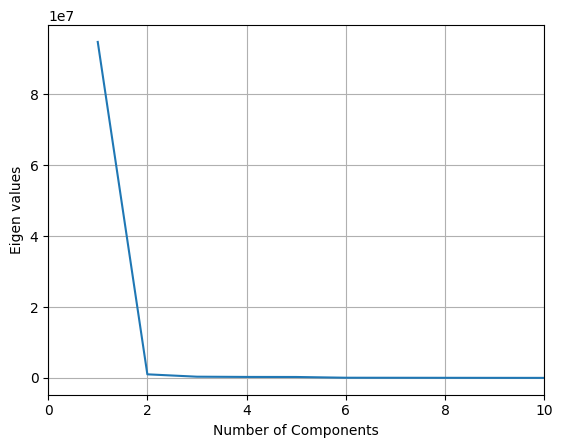

In [75]:
# ELBOW METHOD Plot explained variance against number of components
plt.plot(range(1, len(pca.explained_variance_) + 1), pca.explained_variance_)
plt.xlabel('Number of Components')
plt.ylabel('Eigen values')
plt.grid(True)
plt.xlim(0,10)
plt.show()

As we can see above, the "elbow" is when the number of components is 2.

For the two previous methods, we can guess that the best number of components in between 2 and 10, so we'll be using this range of values for the grid search CV: 

In [76]:
param_grid_pca = {'pca__n_components': [2,3,4,5,6,7,8,9,10,11]}

### PCA for CatBoost

Let's see how decreasing the number of features in the model (keeping those who explain more variance in the data) will affect in the performance of the top previous models.

CatBoost has been the top performing algorithm, so let's try this one first. For this testing, because PCA needs numerical features, we won't able to do the test with the same dataset (with categorical features) that we've used before for CatBoost, so we will use the full numerical dataset that we've used in all others models.

In [77]:
%%time
pipeline_catBoost_pca = Pipeline([
                       ('scaler', StandardScaler()),
                       ('pca', PCA()),
                       ('catBoost',CatBoostRegressor(verbose = 0))])
params_catBoost_pca = {'catBoost__iterations': [350,400,450]} | param_grid_pca # union the params for each step in a unique set.
catBoost_pca_grid = GridSearchCV(pipeline_catBoost_pca, params_catBoost_pca, cv=kf, n_jobs = -1)
catBoost_pca_grid.fit(X_train, y_train)

# Get the best parameters value
print("Best params are:\n")
print(catBoost_pca_grid.best_params_)

Best params are:

{'catBoost__iterations': 450, 'pca__n_components': 11}
CPU times: total: 10.4 s
Wall time: 2min 39s


In [78]:
pred_grid_pipeline_catBoost_pca = catBoost_pca_grid.predict(X_test)
catBoost_pca_df = pd.DataFrame(data=[RMSE(y_test, pred_grid_pipeline_catBoost_pca),r2_score(y_test, pred_grid_pipeline_catBoost_pca)],
             columns=['catBoost Pca Score'],
             index=["RMSE", "R2"])
print("Performance metrics:\n")
print(catBoost_pca_df)
df_results = pd.concat([df_results,catBoost_pca_df.T])

Performance metrics:

      catBoost Pca Score
RMSE        25257.742803
R2              0.886689


### PCA for LightGBM

In [79]:
%%time
pipeline_lightgbm_pca = Pipeline([
                       ('scaler', StandardScaler()),
                       ('pca', PCA()),
                       ('lightgbm',LGBMRegressor(n_jobs= -1,verbose=0))])
params_lightgbm_pca = {
    'lightgbm__boosting_type':['gbdt','dart','rf'],
    'lightgbm__max_depth':[3,4,5],
    'lightgbm__num_leaves':[6,7,8,9,10]} | param_grid_pca # union the params for each step in a unique set.
lightgbm_pca_grid = GridSearchCV(pipeline_lightgbm_pca, params_lightgbm_pca, cv=kf, n_jobs = -1)
lightgbm_pca_grid.fit(X_train, y_train)

# Get the best parameters value
print("Best params are:\n")
print(lightgbm_pca_grid.best_params_)

Best params are:

{'lightgbm__boosting_type': 'gbdt', 'lightgbm__max_depth': 5, 'lightgbm__num_leaves': 7, 'pca__n_components': 9}
CPU times: total: 25.5 s
Wall time: 2min 22s


In [80]:
pred_grid_pipeline_lightgbm_pca = lightgbm_pca_grid.predict(X_test)
lightgbm_pca_df = pd.DataFrame(data=[RMSE(y_test, pred_grid_pipeline_lightgbm_pca),r2_score(y_test, pred_grid_pipeline_lightgbm_pca)],
             columns=['Lightgbm Pca Score'],
             index=["RMSE", "R2"])
print("Performance metrics:\n")
print(lightgbm_pca_df)
df_results = pd.concat([df_results,lightgbm_pca_df.T])

Performance metrics:

      Lightgbm Pca Score
RMSE        26748.522786
R2              0.872918


### PCA for XGMBoost

In [81]:
%%time
pipeline_xgb_pca = Pipeline([
                       ('scaler', StandardScaler()),
                       ('pca', PCA()),
                       ('xgb',XGBRegressor(n_jobs= -1,verbose=0))])
params_xgb_pca = {
     'xgb__n_estimators' : [600,650,700],
     'xgb__max_depth': [-1,2,3,4,5]} | param_grid_pca # union the params for each step in a unique set.
xgb_pca_grid = GridSearchCV(pipeline_xgb_pca, params_xgb_pca, cv=kf, n_jobs = -1)
xgb_pca_grid.fit(X_train, y_train)

# Get the best parameters value
print("Best params are:\n")
print(xgb_pca_grid.best_params_)

Best params are:

{'pca__n_components': 10, 'xgb__max_depth': 5, 'xgb__n_estimators': 600}
CPU times: total: 16.3 s
Wall time: 2min 30s


In [82]:
pred_grid_pipeline_xgb_pca = xgb_pca_grid.predict(X_test)
Xgb_pca_df = pd.DataFrame(data=[RMSE(y_test, pred_grid_pipeline_xgb_pca),r2_score(y_test, pred_grid_pipeline_xgb_pca)],
             columns=['Xgb Pca Score'],
             index=["RMSE", "R2"])
print("Performance metrics:\n")
print(Xgb_pca_df)
df_results = pd.concat([df_results,Xgb_pca_df.T])

Performance metrics:

      Xgb Pca Score
RMSE   29395.443739
R2         0.846523


### PCA for Lasso

In [83]:
%%time
pipeline_lasso_pca = Pipeline([
                       ('scaler', StandardScaler()),
                       ('pca', PCA()),
                       ('lasso',Lasso())])
params_lasso_pca = lasso_params | param_grid_pca # union the params for each step in a unique set.
lasso_pca_grid = GridSearchCV(pipeline_lasso_pca, params_lasso_pca, cv=kf)
lasso_pca_grid.fit(X_train, y_train)

# Get the best parameters value
print("Best params are:\n")
print(lasso_pca_grid.best_params_)

Best params are:

{'lasso__alpha': 0.1, 'pca__n_components': 10}
CPU times: total: 1min 12s
Wall time: 18.1 s


In [84]:
pred_lasso_pca = lasso_pca_grid.predict(X_test)
lasso_pca_df = pd.DataFrame(data=[RMSE(y_test, pred_lasso_pca),r2_score(y_test, pred_lasso_pca)],
             columns=['Lasso Pca model Score'],
             index=["RMSE", "R2"])
print("Performance metrics:\n")
print(lasso_pca_df)
df_results = pd.concat([df_results,lasso_pca_df.T])

Performance metrics:

      Lasso Pca model Score
RMSE           30647.743299
R2                 0.833168


<a id='BEST'></a>
## Best Model

As you can see in the next cell, using the PCA method has had little effect on the performance and the best model is still the CatBoost.

In [85]:
df_results.sort_values(by='R2', ascending=False)

,RMSE,R2
catBoost Score,19111.318220,0.919822
Lightgmb Score,21965.389512,0.914304
XGB Score,22903.288331,0.906829
Random Forest Score,24854.382761,0.890279
catBoost Pca Score,25257.742803,0.886689
Lasso Score,26290.517656,0.877233
elasticnet Score,26519.716080,0.875083
Ridge Score,26606.641233,0.874263
Lightgbm Pca Score,26748.522786,0.872918
Xgb Pca Score,29395.443739,0.846523


Finally, the R2 of our best model is above 0.92, so we could say that **our model performs well**. Also, this value of R2 means that our model explains the 92% of the variability of the data.

### Save model

Now we have find a good model, we'll save it in order to use it in the future:

In [86]:
filename = "regressor_sale_house_price_catBoost.pickle"
pickle.dump(grid_catBoost, open(filename, "wb"))

<a id='INTERPRET'></a>
### Interpret de model

Let's find out which features the model considers more important in order to predict the price of a house:

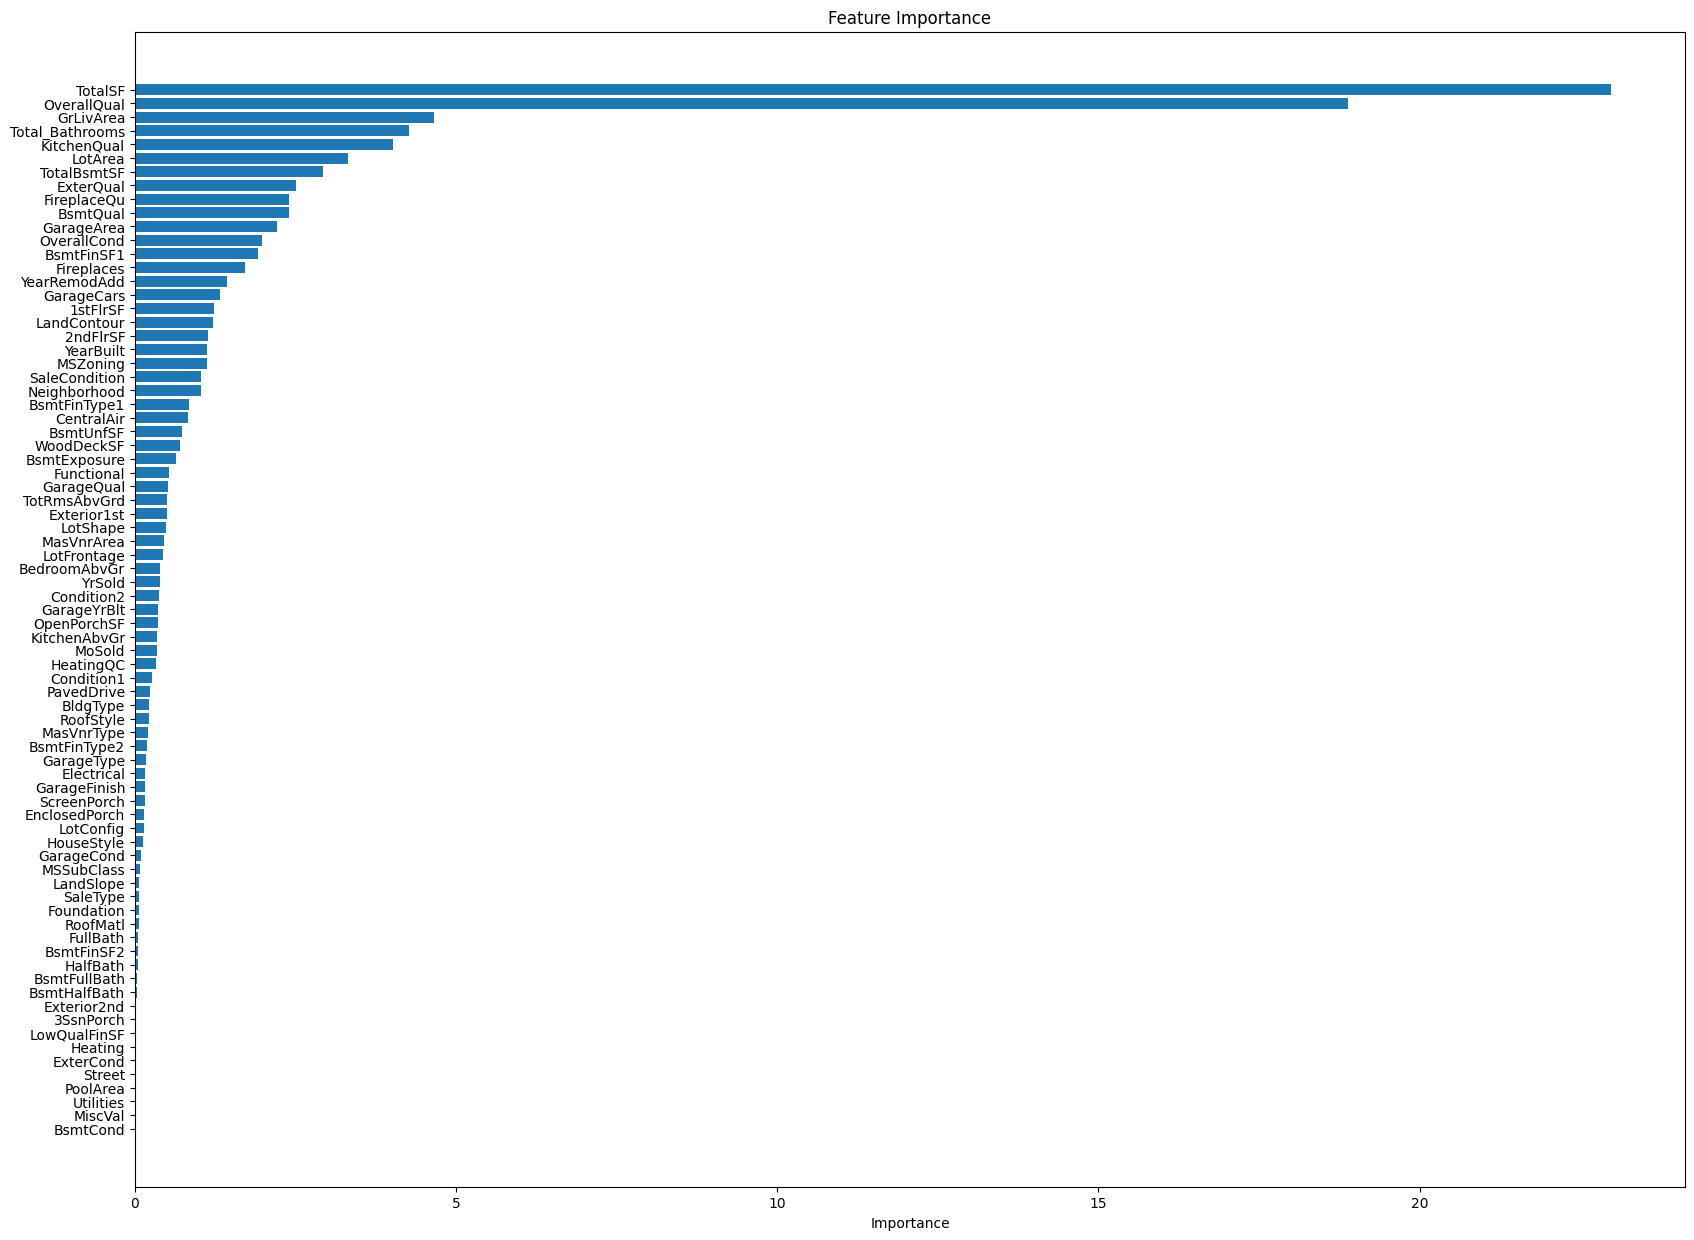

In [87]:
# Access feature importances
importances = grid_catBoost.best_estimator_.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': df_modeling_categorical.columns.drop("SalePrice"), 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)
                                                          
plt.figure(figsize=(20, 15))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

As we can see above, the most important feature is **TotalSF**, i.e., the total surface of the house, including the basement. Secondly, the most important feature is **OverallQual**, i.e., the rate of the overall material and finish of the house. With a large difference importance, the following more important features are: total of bathrooms, the total surface of the living zone, the neighborhood and the rate of the exterior qualities and the capacity of the cars in the garage among others.

<a id='PYCARET'></a>
## Bonus: Pycaret

PyCaret is a Python library for simplified machine learning workflows, offering automated model training, hyperparameter tuning, and comprehensive visualizations. 

In [88]:
# check installed version
import pycaret
pycaret.__version__

'3.2.0'

In [89]:
# import pycaret regression and init setup
from pycaret.regression import *
s = setup(df_inputed_nulls, target = 'SalePrice', session_id = 123)

,Description,Value
0,Session id,123
1,Target,SalePrice
2,Target type,Regression
3,Original data shape,"(1451, 231)"
4,Transformed data shape,"(1451, 231)"
5,Transformed train set shape,"(1015, 231)"
6,Transformed test set shape,"(436, 231)"
7,Numeric features,230
8,Preprocess,True
9,Imputation type,simple


In [90]:
# compare baseline models
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,13936.2905,508768359.6845,21938.0727,0.8993,0.1170,0.0823,3.1640
lightgbm,Light Gradient Boosting Machine,15547.6534,584812851.2968,23695.2510,0.8816,0.1281,0.0918,0.2230
et,Extra Trees Regressor,15895.0145,611611904.8429,24135.7852,0.8787,0.1285,0.0938,1.2870
gbr,Gradient Boosting Regressor,15596.6724,607080630.3706,24061.3562,0.8781,0.1297,0.0931,0.4190
rf,Random Forest Regressor,16542.8376,652120559.3498,25026.3396,0.8697,0.1347,0.0982,1.4440
br,Bayesian Ridge,16261.0548,659567059.2000,24413.7656,0.8688,0.1455,0.0988,0.0630
xgboost,Extreme Gradient Boosting,17092.7906,691612886.4000,25918.4770,0.8598,0.1363,0.0995,0.2180
ridge,Ridge Regression,17064.6634,738229705.6000,26015.5662,0.8552,0.1784,0.1043,0.0330
llar,Lasso Least Angle Regression,16539.2279,765245331.2000,26123.5359,0.8518,0.1607,0.1001,0.0350
en,Elastic Net,17726.1774,783889942.4000,26842.7387,0.8451,0.1517,0.1059,0.0690


In [91]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [92]:
tuned_best_model = tune_model(best)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,15389.4346,628195629.4495,25063.8311,0.8785,0.1222,0.0868
1,15301.7831,505125240.0008,22474.9914,0.8560,0.1236,0.0884
2,13205.9407,333561528.5047,18263.6669,0.9129,0.1248,0.0878
3,15740.0056,460878132.6264,21468.0724,0.9256,0.1205,0.0918
4,16817.0621,1073548190.6676,32765.0453,0.8037,0.1536,0.1059
5,14746.5690,407079416.5315,20176.2092,0.8926,0.1322,0.0914
6,18433.4601,748159086.7817,27352.4969,0.8894,0.1305,0.1007
7,14347.6615,405071080.6799,20126.3777,0.9174,0.1004,0.0787
8,17306.2942,914167154.5253,30235.1973,0.8589,0.1711,0.1057


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [93]:
tuned_best_model

As we can see above, we've get better results than pycaret library.

<a id='PRODUCTION'></a>
# To production

To recap, what we have done so far is analyze a dataset on houses in the United States, and we have created a model capable of predicting the selling price based on the features of the dataset. Now, we are going to leverage this model and truly see the value that this work will bring us.

First of all, let's load the new data, the model we've just created and apply the feature engineering necessary to being able to apply the model:

In [94]:
df_test = pd.read_csv('test.csv')
df_test.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


Let's apply the feature engineering:

In [95]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

## Apply feature engineering
df_test_copy = df_test.copy()
ids = df_test_copy.pop('Id')
df_test_transformed =  feature_engineering_sale_price_dataset(df_test_copy)
categorical_columns = df_test_transformed.select_dtypes(include=['object']).columns.tolist()
df_test_transformed[categorical_columns] = df_test_transformed[categorical_columns].fillna('NaN')

## Apply the model to get the price prediction
prediction_house_price = loaded_model.predict(df_test_transformed)      

# Join all features in the same dataframe
df_final_results = df_test.copy()
#Add useful features
df_final_results['TotalSF'] = df_final_results['TotalBsmtSF'] + df_final_results['GrLivArea']
df_final_results['Total_Bathrooms'] = df_final_results['FullBath'] + df_final_results['HalfBath'] + df_final_results['BsmtFullBath'] + df_final_results['BsmtHalfBath']   
df_final_results["SalePricePredicted"] = prediction_house_price.round().astype(int)
df_final_results.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalSF,Total_Bathrooms,SalePricePredicted
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,MnPrv,NaN,0,6,2010,WD,Normal,1778.0,1.0,117847
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,NaN,Gar2,12500,6,2010,WD,Normal,2658.0,2.0,165324
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,MnPrv,NaN,0,3,2010,WD,Normal,2557.0,3.0,183397


In [96]:
df_final_results.to_csv('house_dataset_w_predicted_price.csv', index=False)
df_final_results.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalSF,Total_Bathrooms,SalePricePredicted
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,MnPrv,NaN,0,6,2010,WD,Normal,1778.0,1.0,117847
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,NaN,Gar2,12500,6,2010,WD,Normal,2658.0,2.0,165324
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,MnPrv,NaN,0,3,2010,WD,Normal,2557.0,3.0,183397
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,6,2010,WD,Normal,2530.0,3.0,185562
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,NaN,NaN,0,1,2010,WD,Normal,2560.0,2.0,185864


<a id='NEWINSIGHTS'></a>
## Which insights we can get from new data?

Let's imagine, that we work in a real statement business. With the historical data of the houses sold by the last 4 years, we've built a model that is able to predict the price of the house that will be sold, so, we can assume that actually we're predicting the market price.

Now, we have a portfolio of houses to sell and we want to know the market price for each house to help the seller owner to pick the right price and also to guide new buyers what they can afford. 

In the next sections, we'll be answering those questions.

### Which are the cheapiest and the most expensive neighborhoods?

Knowing the market price of the houses, we can share with new buyers which neighborhood they could afford, telling them the mean of the house prices and the mean of the price per sq.

In [97]:
df_final_results["PricePerSq"] = df_final_results["SalePricePredicted"]/df_final_results["TotalSF"]
price_per_neighborhood = df_final_results.groupby(["Neighborhood"])["SalePricePredicted"].mean()
price_sq_per_neighborhood = df_final_results.groupby(["Neighborhood"])["PricePerSq"].mean()
df_price_per_neighborhood = price_per_neighborhood.to_frame(name="AVG Price")
df_price_sq_per_neighborhood = price_sq_per_neighborhood.to_frame(name="AVG Price/SQ")
pd.merge(df_price_per_neighborhood, df_price_sq_per_neighborhood, on="Neighborhood").round(2).sort_values(by="AVG Price")


,AVG Price,AVG Price/SQ
Neighborhood,,
MeadowV,93594.15,56.88
BrDale,102318.14,63.48
IDOTRR,107452.14,57.74
BrkSide,121976.88,61.12
OldTown,122156.74,58.47
SWISU,125466.61,55.45
Sawyer,134047.95,66.31
Edwards,134369.89,64.80
Blueste,140079.50,76.20


As we can see above, for low budget clients we can suggest neighborhoods as MeadowV or BrDale and so on. For high budget clients we, can suggest NridgHT and StoneBr neighborhoods.

### Which type of building can I suggest by price?

As we've done before, let's show the average price per type of building and its average price/sq.

In [98]:
price_per_BldgType = df_final_results.groupby(["BldgType"])["SalePricePredicted"].mean()
price_sq_per_BldgType = df_final_results.groupby(["BldgType"])["PricePerSq"].mean()
df_price_per_BldgType = price_per_BldgType.to_frame(name="AVG Price")
df_price_sq_per_BldgType = price_sq_per_BldgType.to_frame(name="AVG Price/SQ")
pd.merge(df_price_per_BldgType, df_price_sq_per_BldgType, on="BldgType").round(2).sort_values(by="AVG Price")

,AVG Price,AVG Price/SQ
BldgType,,
2fmCon,125862.29,53.47
Twnhs,132762.96,67.56
Duplex,147466.70,55.53
1Fam,180446.33,70.34
TwnhsE,199061.81,76.63


The cheapest building types are: the Two-family Conversion (2fmCon) and Townhouse Inside Unit (TwnhsI) and the most expensive building types are: Single-family Detached (1Fam) and Townhouse End Unit (TwnhsE).

### Optimizing real estate profitability

The fact that we could know in advance the market price of the house, that doesn't mean that this finally will be the sale price. Maybe some sellers prefer to set a lower selling price to speed up the selling or some sellers don't want to sell below a certain price. So let's imagine we have all the selling prices for the portfolio we're working on (for that purpose will add some random noise to our predicted price and we'll imagine that this is the selling price).

In [99]:
# Set the seed for reproducibility
np.random.seed(42)
random_vector = np.random.normal(0, np.sqrt(100000000), df_final_results.shape[0]).round().astype(int)
df_final_results['SellingPrice'] = df_final_results['SalePricePredicted'] + random_vector

For those sellers, that are willing to sell the house below the market price, we can set a larger profit for the company until reaching (or almost reaching) the market price for which we believe the property will be sold. These properties are:

In [100]:
df_final_results['Price Difference'] = df_final_results['SalePricePredicted'] - df_final_results['SellingPrice']
df_final_results[['Id','Price Difference']].sort_values(by='Price Difference').head(10)

,Id,Price Difference
209,1670,-38527
478,1939,-30789
179,1640,-27202
755,2216,-26324
1453,2914,-26017
1233,2694,-25797
654,2115,-25734
762,2223,-25601
880,2341,-25269
1291,2752,-24930


Above, we can see the identification of those properties with lower selling prices respect to the market price.

Also, let's check which properties are being sold with higher selling prices:

In [101]:
df_final_results[['Id','Price Difference']].sort_values(by='Price Difference', ascending=False).head(10)

,Id,Price Difference
262,1723,32413
1101,2562,28963
1061,2522,28485
646,2107,26969
668,2129,26510
74,1535,26197
1355,2816,25910
1346,2807,25539
1160,2621,24994
544,2005,24716


For properties above, we should set a lower profit and also suggest a lower selling price to the seller.

<a id='SHARE'></a>

### Share results with the company
An important part of an ML project is being able to make the trained model available for other teams or colleagues of the company to take advantage of the insights they can get of it. One technical way could be creating an API that our colleagues could make their own predictions. Another approach it could be to present the results in an interactive report and enable anyone with the link to get their own insights.

That's why I've created an example of a [report](https://lookerstudio.google.com/s/p-JgLucqaOc) that we could create with the results of the model:

In [102]:
from IPython.display import IFrame, HTML
ulr= 'https://lookerstudio.google.com/embed/reporting/69313d85-34c5-4552-b44d-cefe48c3a18f/page/8ZboD'
IFrame(ulr, width='100%', height=500) 